# 데이터 EDA (Exploratory Data Analysis)

 ## [0] 데이터 개요
 
 > user data
 
  1. shape (68092, 3)
  2. 결측치 : "age" column에 결측값 존재
  3. 데이터 타입 : float64(1), int64(1), object(1)
  
   [location]
  1. location의 가장 많은 값이 toronto,ontario,canada인가? 왜?
  2. location의 city,state,country 모두 nan인 값은 9개
   
   [age]
  1. 싱가폴의 경우 10댜후반에서 50대초반까지만 값이 있는 이유? 
  2. 평균적으로 30세 즈음이 최댓값이지만 몇개의 국가는 상이함  -> 특이 케이스를 나누어서 모델링..?

 > book
  1. ISBN -> 앞에 4자리..? 이상하지만 일단 ...
  2. 1376년 부터 2006년 까지의 책으로 구성됨 -> 1376.0, 1378.0, 1806.0, 1900. 오타 아냐..? -> 1900년대 이전의 값을 사용할 필요성이 있나..?

> 
  [4] ratings
 `user_id`, `isbn`, `rating` 으로 이뤄져있습니다.
 
 `59803명` `306795data` 
 `1-10점` `8점이 제일 많음`
  1. HEAVY 유저의 경우 10점을 잘 주지 않음 -> HEAVY유저에 대한 처리 어떻게? -> HEAVY유저를 따로 모델링? / hEAVY 유저가 10점을 준것에 대한 가중치 조절?
  2. 그래프상에서 훅떨어지는 부분은 뭐지 ? 


<COUNTRY> 
  1. 이상한 값 -> 클랜징 : 어떻게 찾으셨는지
  2.  결측치 -> 결측치 삭제 / 결측치 그대로 / 3개 값중 한개만 있는 경우만 채우기
   COUNTRY STATE CITY
     x       x    0
<카테로리 범주화>
-> 토크나이저
-----
<물어보기>
1. 지표확인 방법은? 제출해보지 않고 알수 있는 방법
2.  EDA 정리한 데이터를 넣는 방법
3. 오버피팅 된 것이라고 어떻게 알았는지


## [1] 데이터 불러오기

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # MATLAB과 비슷하게 명령어 스타일로 동작하는 함수
import re
import csv

In [24]:
pwd

'/opt/ml/code/src/models/CNN_FM'

In [25]:
path='/opt/ml/data/'

users = pd.read_csv(path +'users.csv')
books = pd.read_csv(path + "books.csv")
train_ratings = pd.read_csv(path + "train_ratings.csv")
test_ratings = pd.read_csv(path + "test_ratings.csv")

In [26]:
print("users shape",users.shape)
print("books shape",books.shape)
print("train_ratings shape",train_ratings.shape)
print("test_ratings shape",test_ratings.shape)

users shape (68092, 3)
books shape (149570, 10)
train_ratings shape (306795, 3)
test_ratings shape (76699, 3)


## [2] users 데이터 

In [32]:
users.head(7)

,user_id,location,age
0,8,"timmins, ontario, canada",NaN
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",NaN
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0
5,96054,"ottawa, ontario, canada",29.0
6,116866,"ottawa, ,",NaN


In [33]:
users.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   68092 non-null  int64  
 1   location  68092 non-null  object 
 2   age       40259 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


 > user data
 
     (1)shape (68092, 3)
     (2)결측치 
       : "age" column에 결측값 존재
     (3)데이터 타입 : float64(1), int64(1), object(1)
     

In [63]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,68092.0,139381.329539,80523.969862,8.0,69008.75,138845.5,209388.25,278854.0
age,40259.0,36.069873,13.842571,5.0,25.00,34.0,45.00,99.0


In [39]:
users[(users['location'].str.contains('toronto, ontario, canada'))] # 수정필yo

,user_id,location,age
3,67544,"toronto, ontario, canada",30.0
57,98499,"toronto, ontario, canada",NaN
130,47971,"toronto, ontario, canada",40.0
514,95392,"toronto, ontario, canada",25.0
977,43246,"toronto, ontario, canada",36.0
...,...,...,...
67304,229203,"toronto, ontario, canada",NaN
67377,232608,"toronto, ontario, canada",NaN
67688,250644,"toronto, ontario, canada",NaN
67920,266991,"toronto, ontario, canada",27.0


In [40]:
users['user_id'].nunique()

68092

In [41]:
users.isna().sum()/len(users) # age 약 40퍼센트 결측치

user_id     0.000000
location    0.000000
age         0.408756
dtype: float64

### (2-1) Preprocessing & Feature Engineering¶

In [34]:
#users['location'] = users['location'].str.replace(r'[^0-9a-zA-Z:,]', '') # 특수문자 제거
users['location'] = users['location'].apply(lambda x: re.sub(r'[^0-9a-zA-Z:,]', '',x))

users['location_city'] = users['location'].apply(lambda x: x.split(',')[0].strip())
users['location_state'] = users['location'].apply(lambda x: x.split(',')[1].strip())
users['location_country'] = users['location'].apply(lambda x: x.split(',')[2].strip())

users = users.replace('na', np.nan) #특수문자 제거로 n/a가 na로 바뀌게 되었습니다. 따라서 이를 컴퓨터가 인식할 수 있는 결측값으로 변환합니다.
users = users.replace('', np.nan) # 일부 경우 , , ,으로 입력된 경우가 있었으므로 이런 경우에도 결측값으로 변환합니다.


In [35]:
users.head(10)

,user_id,location,age,location_city,location_state,location_country
0,8,"timmins,ontario,canada",NaN,timmins,ontario,canada
1,11400,"ottawa,ontario,canada",49.0,ottawa,ontario,canada
2,11676,"na,na,na",NaN,NaN,NaN,NaN
3,67544,"toronto,ontario,canada",30.0,toronto,ontario,canada
4,85526,"victoria,britishcolumbia,canada",36.0,victoria,britishcolumbia,canada
5,96054,"ottawa,ontario,canada",29.0,ottawa,ontario,canada
6,116866,"ottawa,,",NaN,ottawa,NaN,NaN
7,123629,"kingston,ontario,canada",NaN,kingston,ontario,canada
8,177458,"ottawa,ontario,canada",29.0,ottawa,ontario,canada
9,200273,"comber,ontario,canada",NaN,comber,ontario,canada


In [36]:
users.isna().sum()

user_id                 0
location                0
age                 27833
location_city         122
location_state       3254
location_country     2124
dtype: int64

In [37]:
num_uppercase = users['location'].str.count(r'[A-Z]').sum() 
num_uppercase # 대문자 없음

0

#### 확인 1 for user_data
1. age는 40퍼센트 결측치
2. location은 모두 소문자로 작성됨
3. location의 모든 요소가 모두 결측값인 경우

### (2-1-1) user_location
- case1 : 작은 범위로 부터 큰 범위를 유추할 수 있는 경우

#### case1(1) 
    : city 0 state x country x / location은 변경 x

In [79]:
# case1(1)에 대한 user_id값을 저장
id_values =users[(users['location_city'].notnull())&
                   (users['location_state'].isna())&(users['location_country'].isna())]['user_id'].values
id_values

array([116866, 115097, 245827, ..., 267240, 267276, 276221])

예시) id = 116866인 경우

In [103]:
users[users['user_id']==115097]

,user_id,location,age,location_city,location_state,location_country
32,115097,"seattle,,",27.0,seattle,NaN,NaN


In [162]:
id = 115097
city = users[users['user_id']==id]['location_city'].values
location = users.loc[users['location'].str.contains(city[0]),'location'].value_counts().index[0]
location.split(',')[1]

users.loc[users[users['user_id']==id].index,'location_state']= location.split(',')[1]
users.loc[users[users['user_id']==id].index,'location_country'] = location.split(',')[2]

users[users['user_id']==id]

,user_id,location,age,location_city,location_state,location_country
32,115097,"seattle,,",27.0,seattle,washington,usa


In [105]:
# case1(1)에 해당하는 user의 location 수정하기
for id in id_values:
    city = users[users['user_id']==id]['location_city'].values
    location = users.loc[users['location'].str.contains(city[0]),'location'].value_counts().index[0]
    users.loc[users[users['user_id']==id].index,'location_state'] = location.split(',')[1]
    users.loc[users[users['user_id']==id].index,'location_country'] = location.split(',')[2]

In [106]:
users.isna().sum()

user_id                 0
location                0
age                 27833
location_city         122
location_state       1762
location_country      632
dtype: int64

#### case1(2)
    : city X state O country x / location은 변경 x

In [117]:
# case1(2)에 대한 user_id값을 저장
id2_values =users[(users['location_city'].isna())&
                   (users['location_state'].notnull())&(users['location_country'].isna())]['user_id'].values
id2_values

array([], dtype=int64)

In [113]:
# case1(2)에 해당하는 user의 location 수정하기
for id in id2_values:
    state = users[users['user_id']==id]['location_state'].values
    location = users.loc[users['location'].str.contains(state[0]),'location'].value_counts().index[0]
    users.loc[users[users['user_id']==id].index,'location_city'] = location.split(',')[0]
    users.loc[users[users['user_id']==id].index,'location_country'] = location.split(',')[2]

In [114]:
users.isna().sum()

user_id                 0
location                0
age                 27833
location_city         120
location_state       1762
location_country      630
dtype: int64

#### case2(1)
    : 참고할 값이 2개인 경우 --> city와 country을 토대로 유추한 state값이 동일할 경우만 채우기
    : city O state X country O / location은 변경 x
    * state값이 아예 없는 경우 

In [119]:
id3_values =users[(users['location_city'].notnull())&
                   (users['location_state'].isna())&(users['location_country'].notnull())]['user_id'].values
id3_values

array([271622,   8674,  10570, ..., 276660, 276729, 277514])

> 예시)

In [169]:
users[users["user_id"]==271622]

,user_id,location,age,location_city,location_state,location_country
633,271622,"malmok,na,aruba",NaN,malmok,na,aruba


In [170]:
id = 271622
city = users[users['user_id']==id]['location_city'].values
country = users[users['user_id']==id]['location_country'].values
location_refer = users.loc[users['location'].str.contains(city[0]),'location'].value_counts().idxmax().split(',')
if city == location_refer[0] and country == location_refer[2]:
    users.loc[users[users['user_id']==id].index,'location_state'] = location_refer[1]

In [171]:
users[users["user_id"]==271622]

,user_id,location,age,location_city,location_state,location_country
633,271622,"malmok,na,aruba",NaN,malmok,na,aruba


> case1(2)에 해당하는 모든 user 수정하기

In [167]:
# case1(2)에 해당하는 user의 location 수정하기
for id in id3_values:
    city = users[users['user_id']==id]['location_city'].values
    country = users[users['user_id']==id]['location_country'].values
    location_refer = users.loc[users['location'].str.contains(city[0]),'location'].value_counts().idxmax().split(',')
    if city == location_refer[0] and country == location_refer[2]:
        users.loc[users[users['user_id']==id].index,'location_state'] = location_refer[1]


In [168]:
users.isna().sum()

user_id                 0
location                0
age                 27833
location_city         120
location_state        278
location_country      630
dtype: int64

#### case2(2)
    : 참고할 수 있는 값이 2개인 경우 -> city와 state을 토대로 유추한 country값이 동일할 경우만 채우기
    : city O state O country X / location은 변경 x 

In [175]:
users[(users['location_city'].notnull())&
                   (users['location_state'].notnull())&(users['location_country'].isna())]

,user_id,location,age,location_city,location_state,location_country
143,57632,"pearland,texas,",NaN,pearland,texas,NaN
273,141444,"westspringfield,massachusetts,",NaN,westspringfield,massachusetts,NaN
651,141518,"vigo,pontevedra,",27.0,vigo,pontevedra,NaN
1358,98026,"yarmouth,novascotia,",40.0,yarmouth,novascotia,NaN
1555,129929,"manchester,newhampshire,",NaN,manchester,newhampshire,NaN
...,...,...,...,...,...,...
67515,240438,"wilfleinsdorf,niederoesterreich,",16.0,wilfleinsdorf,niederoesterreich,NaN
67539,241691,"buenosaires,buenosaires,",24.0,buenosaires,buenosaires,NaN
67619,247213,"stuttgart,badenwrttemberg,",NaN,stuttgart,badenwrttemberg,NaN
67797,257311,"lisbon,maine,",36.0,lisbon,maine,NaN


In [174]:
id4_values =users[(users['location_city'].notnull())&
                   (users['location_state'].notnull())&(users['location_country'].isna())]['user_id'].values

> 예시)

In [177]:
users[users["user_id"]==57632]

,user_id,location,age,location_city,location_state,location_country
143,57632,"pearland,texas,",NaN,pearland,texas,NaN


In [191]:
id = 57632
city = users[users['user_id']==id]['location_city'].values
state = users[users['user_id']==id]['location_state'].values
location_refer = users.loc[users['location'].str.contains(city[0]),'location'].value_counts().idxmax().split(',')
print(location_refer)
if city == location_refer[0] and state == location_refer[1]:
    users.loc[users[users['user_id']==id].index,'location_country'] = location_refer[2]

['pearland', 'texas', 'usa']


In [192]:
users[users["user_id"]==57632]

,user_id,location,age,location_city,location_state,location_country
143,57632,"pearland,texas,",NaN,pearland,texas,usa


> 전체 수정하기

In [195]:
# case2(2)에 해당하는 user의 location 수정하기
for id in id4_values:
    city = users[users['user_id']==id]['location_city'].values
    state = users[users['user_id']==id]['location_state'].values
    location_refer = users.loc[users['location'].str.contains(city[0]),'location'].value_counts().idxmax().split(',')
    if city == location_refer[0] and state == location_refer[1]:
        users.loc[users[users['user_id']==id].index,'location_country'] = location_refer[2]

In [196]:
users.isna().sum()

user_id                 0
location                0
age                 27833
location_city         120
location_state        278
location_country      144
dtype: int64

#### 결측값 정제 이후

In [202]:
users[users['location_city'].isna()]

,user_id,location,age,location_city,location_state,location_country
2,11676,"na,na,na",NaN,NaN,NaN,NaN
1008,48630,"na,newjersey,usa",34.0,NaN,newjersey,usa
1012,49460,",kansas,usa",37.0,NaN,kansas,usa
1065,56399,"na,surrey,unitedkingdom",63.0,NaN,surrey,unitedkingdom
1200,75081,",illinois,usa",29.0,NaN,illinois,usa
...,...,...,...,...,...,...
67067,216272,",newhampshire,usa",NaN,NaN,newhampshire,usa
67104,218092,"na,na,",NaN,NaN,NaN,NaN
67402,234041,"na,na,sweden",21.0,NaN,NaN,sweden
67805,258088,",iledefrance,france",30.0,NaN,iledefrance,france


In [205]:
na_state=users[users['location_state'].isna()]
na_state.head(20)

,user_id,location,age,location_city,location_state,location_country
2,11676,"na,na,na",NaN,NaN,NaN,NaN
748,12331,"athens,na,greece",31.0,athens,NaN,greece
1026,51856,"wichita,,kansas,usa",59.0,wichita,NaN,kansas
1086,59756,"belgrade,na,yugoslavia",25.0,belgrade,NaN,yugoslavia
1580,133435,"statesville,,northcarolina,usa",40.0,statesville,NaN,northcarolina
1679,146804,"na,na,",NaN,NaN,NaN,NaN
1761,163776,"barboursville,,virginia,usa",29.0,barboursville,NaN,virginia
1819,172293,"na,na,unitedkingdom",NaN,NaN,NaN,unitedkingdom
1898,183923,"dublin,na,ireland",NaN,dublin,NaN,ireland
2117,218290,"hamilton,na,newzealand",14.0,hamilton,NaN,newzealand


In [206]:
users[(users['location_state'].isna())&(users['location_country']=='usa')]

,user_id,location,age,location_city,location_state,location_country
3276,146803,"na,na,usa",NaN,NaN,NaN,usa
5826,54416,"na,na,usa",51.0,NaN,NaN,usa
6654,199359,"sanibel,,usa",NaN,sanibel,NaN,usa
10092,179075,"hampton,,usa",82.0,hampton,NaN,usa
10425,2462,"kingston,,usa",NaN,kingston,NaN,usa
14378,150327,"lombard,,usa",NaN,lombard,NaN,usa
14439,3569,"na,na,usa",NaN,NaN,NaN,usa
15076,51983,"na,na,usa",NaN,NaN,NaN,usa
15784,217223,"campbell,,usa",NaN,campbell,NaN,usa
16868,6102,"jamaica,,usa",28.0,jamaica,NaN,usa


In [208]:
k = users[(users['location_state'].isna())&(users['location_country']=='usa')]
len(k)

28

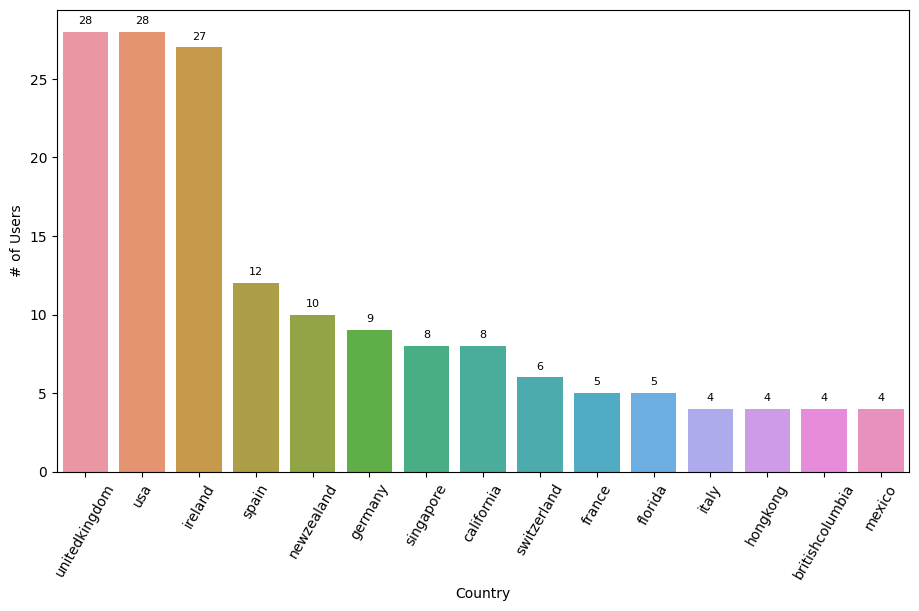

In [201]:
#location_city의 나라별 결측값 분포
my_dict=(users[users['location_state'].isna()]['location_country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['location_country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
fig=plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count',x= 'location_country' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.xlabel("Country", size=10)
plt.ylabel("# of Users", size=10)
plt.show()

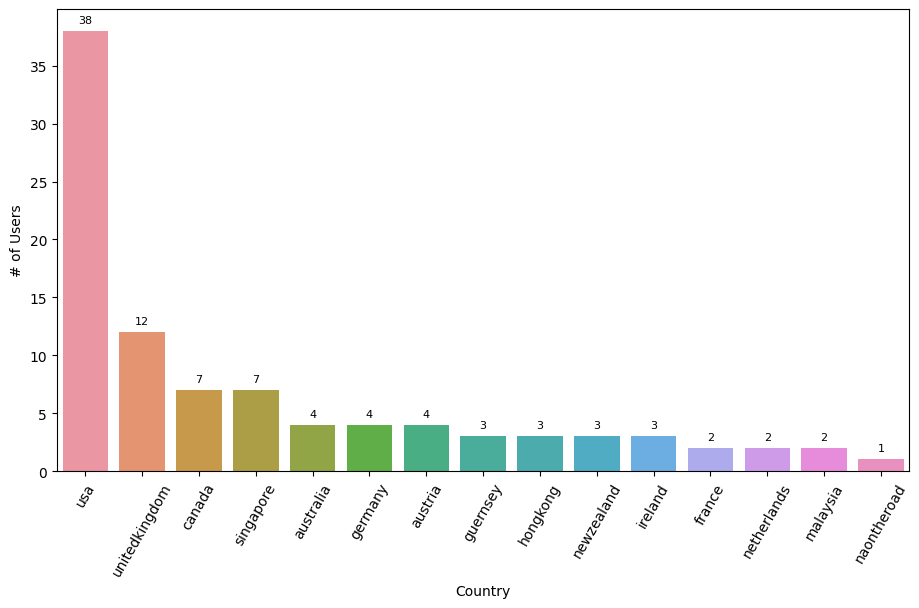

In [200]:
#location_city의 나라별 결측값 분포
my_dict=(users[users['location_city'].isna()]['location_country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['location_country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
fig=plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count',x= 'location_country' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.xlabel("Country", size=10)
plt.ylabel("# of Users", size=10)
plt.show()

### (2-1-2) user_age

#### 미션 EDA 참고

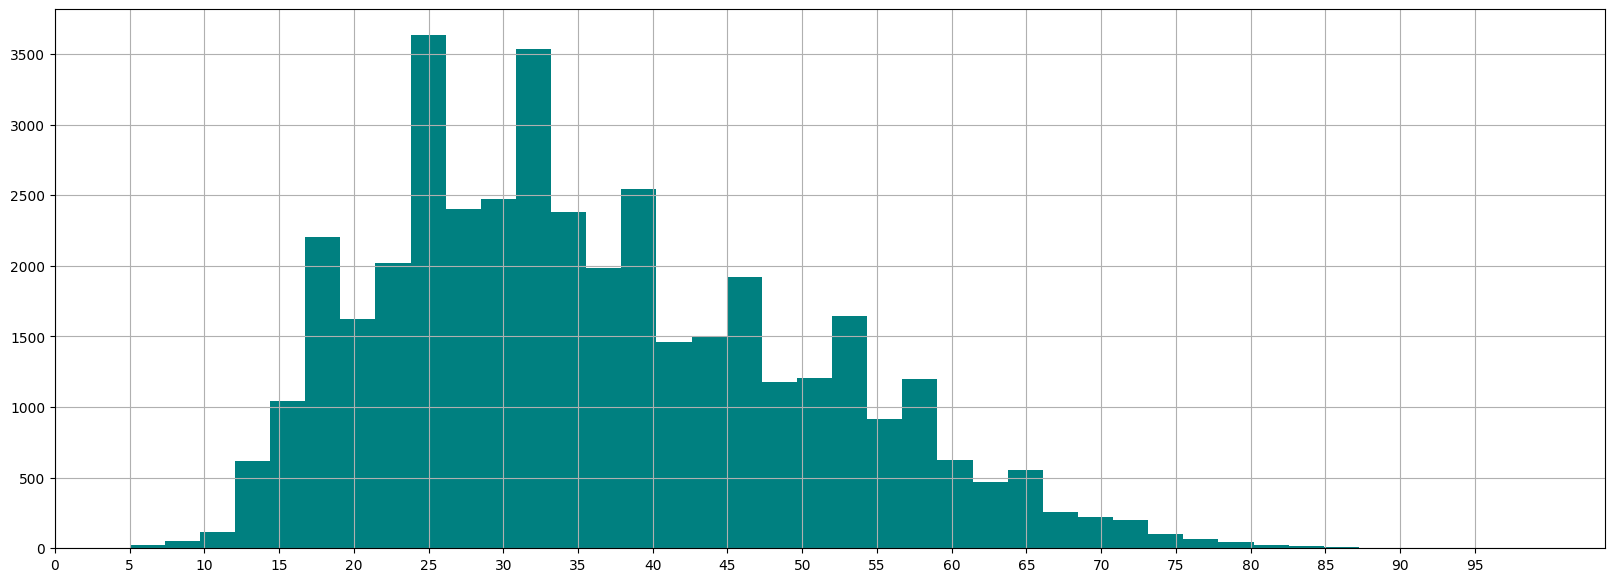

In [96]:
# 나이 분포
fig, ax = plt.subplots(1, 1, figsize=(20, 7))

ax = users['age'].hist(bins=40, color='teal')
xticks = [5*i for i in range(20)]
ax.set_xticks(xticks)
#sns.boxenplot(data=users, x='age', color='teal',ax=ax[1])

plt.show()

> 나이의 분포

In [88]:
users['age'].value_counts()

age
29.0    1290
26.0    1250
25.0    1243
34.0    1215
27.0    1207
        ... 
86.0       1
94.0       1
89.0       1
98.0       1
92.0       1
Name: count, Length: 91, dtype: int64

In [97]:
users['age'].nunique()

91

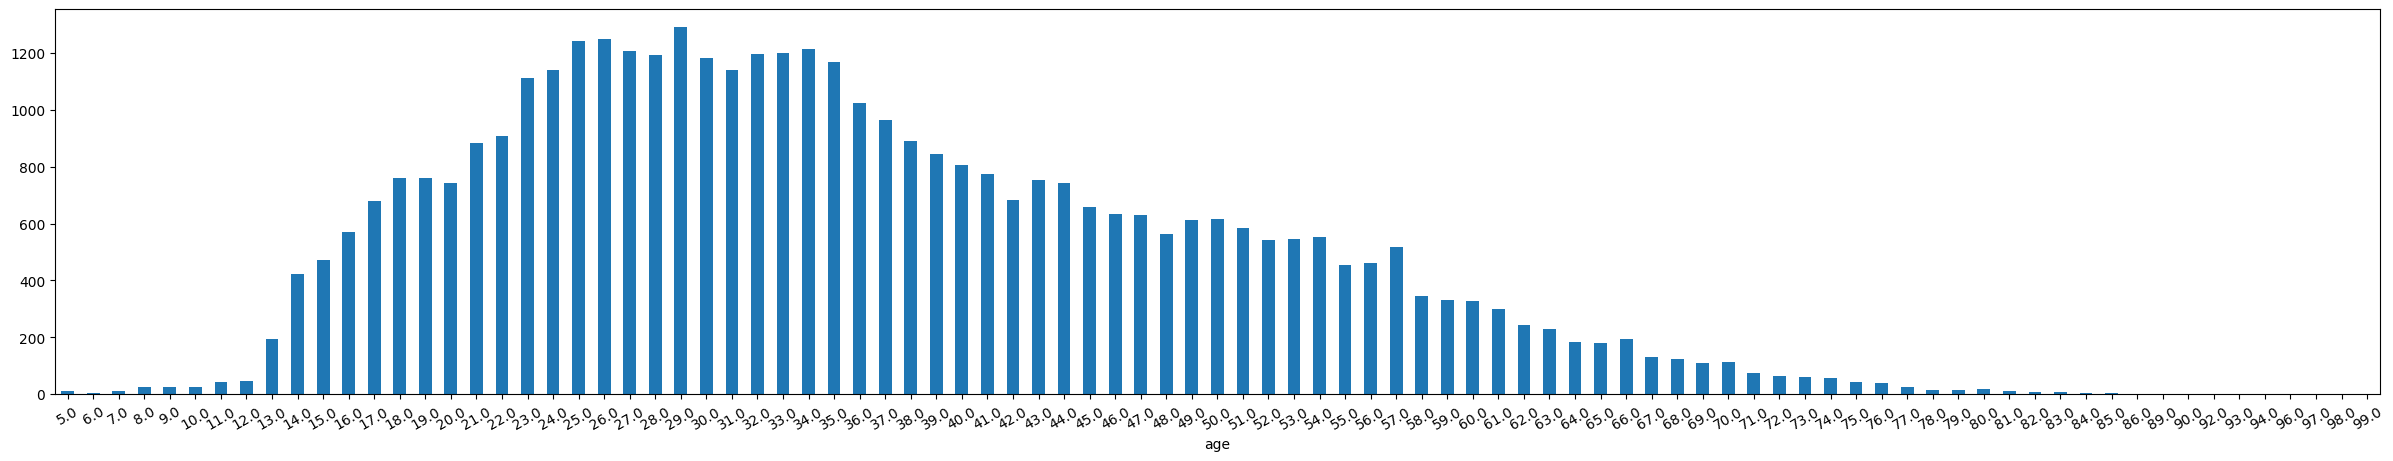

In [98]:
plt.figure(figsize=(30,5))
users['age'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=30)
plt.show()

> 국가 빈도수 확인하기
1. 국가별 빈도수 딕셔너리에 저장(value_counts(), to_dict())
2. 딕셔너리items를 dataframe으로 만들고 columns값 부여 [location,count]
3. count를 기준으로 정렬
4. 상위 15개 국가 저장 후 시각화

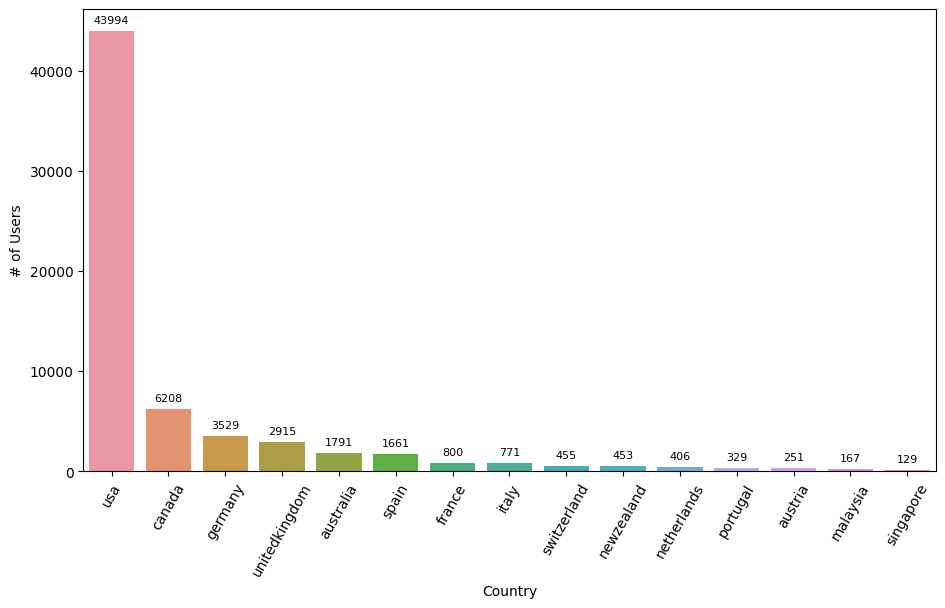

In [103]:
my_dict=(users['location_country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['location_country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
# f.drop(7,inplace=True)

fig=plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count',x= 'location_country' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.xlabel("Country", size=10)
plt.ylabel("# of Users", size=10) # size : 글꼴 크기
plt.show()

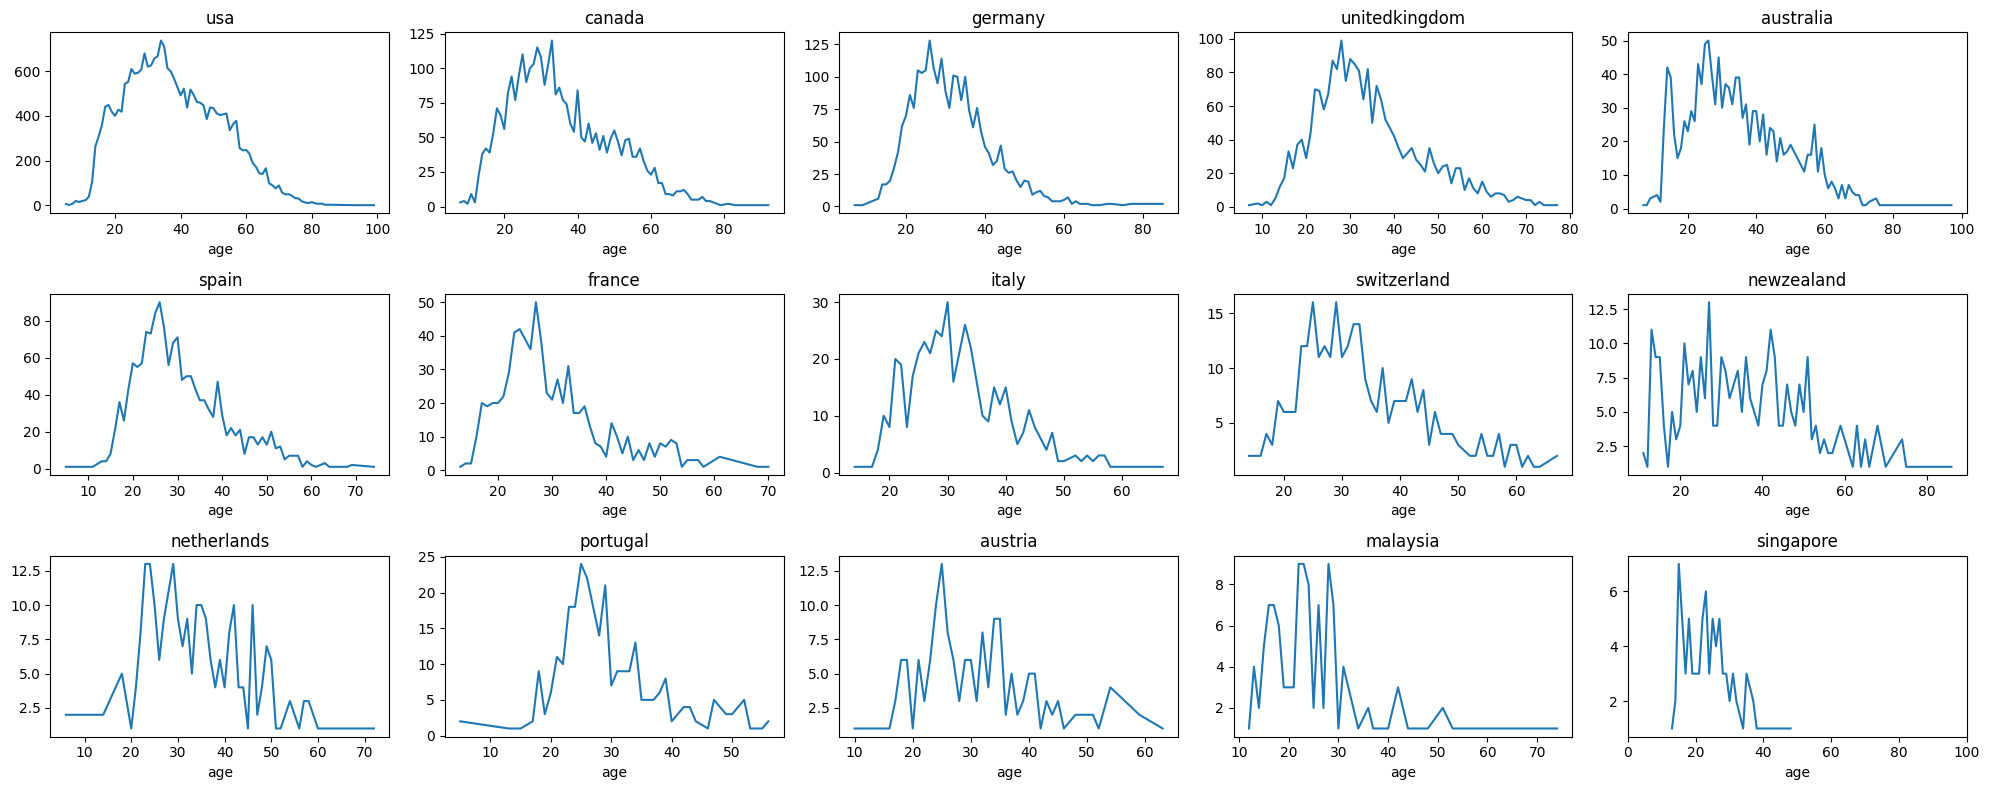

In [104]:
fig, ax = plt.subplots(3,5,figsize=(20,8))
for country, ax_ in zip(f['location_country'], ax.flatten()):
    users[(users['location_country']==country)]['age'].value_counts().sort_index().plot(ax=ax_, title=country)
plt.xlim(0,100) # x축 범위를 0~100
plt.tight_layout() # 코드는 그래프 간격을 자동으로 조정하여 보기좋게 함
plt.show()

##### 의문2
> 싱가폴의 경우 10댜후반에서 50대초반까지만 값이 있는 이유?

> 평균적으로 30세 즈음이 최댓값이지만
  몇개의 국가는 상이함

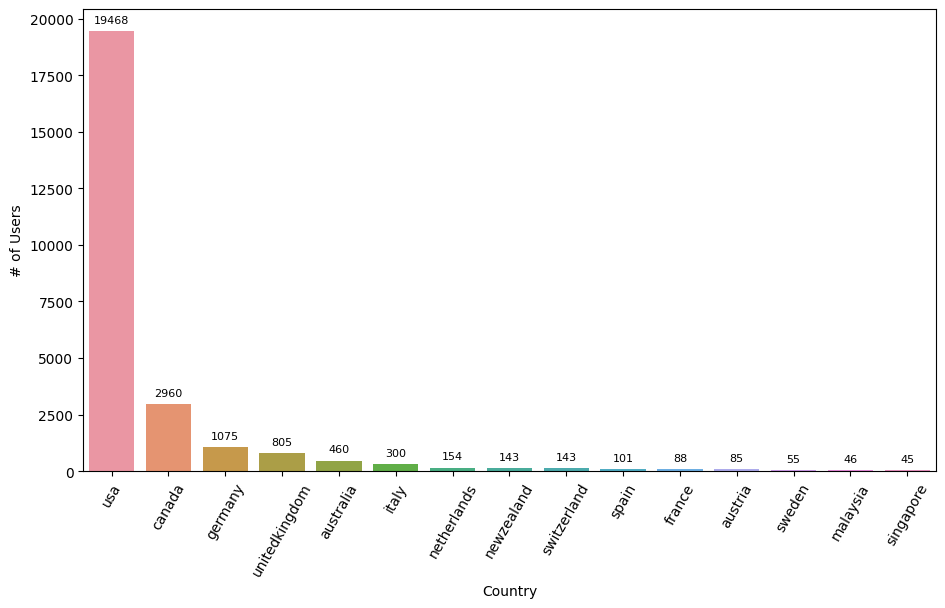

In [107]:
my_dict=(users[users['age'].isna()]['location_country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['location_country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
fig=plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count',x= 'location_country' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.xlabel("Country", size=10)
plt.ylabel("# of Users", size=10)
plt.show()

> 국가의 age 결측값 분포와, 국가별 사용자의 분포가 유사함으로 age의 결측값이 특정국가에 몰려 있다기 보다는 골고루 결측치가 퍼져있다고 할 수 있음

    - 따라서 국가별 평균, 중앙값, 최빈값 등을 결측치에 넣어볼 수 있고, 전체 통계치로 채울수도 있으며, 결측값 자체로 가져가는 방법도 있음

In [ ]:
#users = users.drop(columns='location')

#### 결측값 정제

In [210]:
users['age'].isna().sum()

27833

> age_freq : age값이 가장 많은 top6 국가별 빈도수,평균값,중앙값,최빈값의 딕셔너리

In [279]:
age_freq = users[users['age'].notnull()]['location_country'].value_counts().head(6).to_dict()
total_freq = 35849
for country,num in age_freq.items():
    print(country,end =' : ')
    age_mean = int(users.loc[users['location_country']==country,'age'].mean())
    age_median = int(users.loc[users['location_country']==country,'age'].median())
    age_mode = int(users.loc[users['location_country']==country,'age'].value_counts().idxmax())
    age_freq[country] = [round(num/total_freq,2),age_mean,age_median,age_mode]
    print(age_freq[country])

usa : [0.7, 37, 36, 34]
canada : [0.09, 35, 33, 33]
germany : [0.07, 31, 30, 26]
unitedkingdom : [0.06, 34, 32, 28]
spain : [0.04, 30, 29, 26]
australia : [0.04, 34, 32, 26]


In [280]:
age_freq.items()

dict_items([('usa', [0.7, 37, 36, 34]), ('canada', [0.09, 35, 33, 33]), ('germany', [0.07, 31, 30, 26]), ('unitedkingdom', [0.06, 34, 32, 28]), ('spain', [0.04, 30, 29, 26]), ('australia', [0.04, 34, 32, 26])])

In [281]:
repre_value_mean = 0 
repre_value_median = 0 
repre_value_mode = 0 
for key, value in age_freq.items():
    repre_value_mean += value[0]*value[1]
    repre_value_median += value[0]*value[2]
    repre_value_mode += value[0]*value[3]


In [286]:
# mean으로 결측치 채우기
##users.loc[users['age'].isna(),'age']=repre_value_mean

# median으로 결측치 채우기
##users.loc[users['age'].isna(),'age']=repre_value_median

# mode으로 결측치 채우기
##users.loc[users['age'].isna(),'age']=repre_value_mode

## [3] books

In [108]:
books.shape

(149570, 10)

In [61]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 149570 non-null  object 
 1   book_title           149570 non-null  object 
 2   book_author          149569 non-null  object 
 3   year_of_publication  149570 non-null  float64
 4   publisher            149570 non-null  object 
 5   img_url              149570 non-null  object 
 6   language             82343 non-null   object 
 7   category             80719 non-null   object 
 8   summary              82343 non-null   object 
 9   img_path             149570 non-null  object 
dtypes: float64(1), object(9)
memory usage: 11.4+ MB


In [111]:
books['isbn'].nunique()

149570

In [112]:
books['book_title'].nunique() #같은 제목의 책이 중복됨 (출판사, 출판년도 등에 의해..)

135436

In [115]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,['History'],"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg


books.isna().sum() #language, category, summary에 결측값이 있습니다

### (3-1) Preprocessing & Feature Engineering

### (3-1-1) isbn

In [114]:
books[books['isbn'] != books['img_url'].apply(lambda x: x.split('P/')[1][:10])]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


In [117]:
books[books['isbn']!=books['img_path'].apply(lambda x: x.split('/')[1][:10])]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


In [121]:
publisher_dict=(books['publisher'].value_counts()).to_dict()
len(publisher_dict)

11571

In [ ]:
users[users['location_country'].isna()]Harlequin

In [118]:
publisher_count_df= pd.DataFrame(list(publisher_dict.items()),columns = ['publisher','count'])

publisher_count_df = publisher_count_df.sort_values(by=['count'], ascending = False)

In [119]:
publisher_count_df.head()

,publisher,count
0,Harlequin,3005
1,Ballantine Books,2322
2,Pocket,2274
3,Penguin Books,1943
4,Bantam Books,1938


In [59]:
HARL = books[books['publisher']=="Harlequin"]
HARL.head(20)

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
331,0373030959,"Unfriendly Proposition (Harlequin Romance, No ...",Jessica Steele,1990.0,Harlequin,http://images.amazon.com/images/P/0373030959.0...,NaN,NaN,NaN,images/0373030959.01.THUMBZZZ.jpg
332,0373031106,"Fair Trial (Harlequin Romance, No 3110)",Elizabeth Duke,1991.0,Harlequin,http://images.amazon.com/images/P/0373031106.0...,en,['Fiction'],Fair Trial by Elizabeth Duke released on Jan 2...,images/0373031106.01.THUMBZZZ.jpg
333,0373033605,Brief Encounter (Sealed With A Kiss) (Harlequi...,Catherine George,1995.0,Harlequin,http://images.amazon.com/images/P/0373033605.0...,NaN,NaN,NaN,images/0373033605.01.THUMBZZZ.jpg
334,0373033923,Husband Material (Holding Out For A Hero) (Har...,Emma Goldrick,1995.0,Harlequin,http://images.amazon.com/images/P/0373033923.0...,en,['Fiction'],Husband Material by Emma Goldrick released on ...,images/0373033923.01.THUMBZZZ.jpg
335,0373162669,Always A Bridesmaid (Harlequin American Romanc...,Julie Kistler,1988.0,Harlequin,http://images.amazon.com/images/P/0373162669.0...,en,['Fiction'],Always A Bridesmaid by Julie Kistler released ...,images/0373162669.01.THUMBZZZ.jpg
337,0373224540,Watch Over Me (Rocky Mountain Rescue) (Harleq...,David Bishop,1998.0,Harlequin,http://images.amazon.com/images/P/0373224540.0...,en,['Fiction'],Watch Over Me by Carly Bishop released on Dec ...,images/0373224540.01.THUMBZZZ.jpg
338,0373226063,Bayou Blood Brothers: Tyler/Nick/Jules (Harleq...,Rebecca York,2001.0,Harlequin,http://images.amazon.com/images/P/0373226063.0...,NaN,NaN,NaN,images/0373226063.01.THUMBZZZ.jpg
339,0373226071,Nighttime Guardian (Harlequin Intrigue 607),Amanda Stevens,2001.0,Harlequin,http://images.amazon.com/images/P/0373226071.0...,en,['Fiction'],Nighttime Guardian by Amanda Stevens released ...,images/0373226071.01.THUMBZZZ.jpg
340,0373226144,Familiar Lullaby (Fear Familiar) (Harlequin In...,Caroline Burnes,2001.0,Harlequin,http://images.amazon.com/images/P/0373226144.0...,en,['Fiction'],Familiar Lullaby by Caroline Burnes released o...,images/0373226144.01.THUMBZZZ.jpg
341,0373226276,"His Only Desire (Double Exposure) (Intrigue, 627)",Adrianne Lee,2001.0,Harlequin,http://images.amazon.com/images/P/0373226276.0...,en,['Fiction'],His Only Desire by Adrianne Lee released on Ju...,images/0373226276.01.THUMBZZZ.jpg


In [123]:
books['publisher'].nunique() # 수정전 항목 수를 확인합니다.

11571

### 의문

In [124]:
books[books['isbn'].apply(lambda x: x[2:6])=='0140']['publisher'].unique() ## 

array(['Penguin Books', 'Penguin Books Ltd', 'Puffin Books',
       'Penguin USA (Paper)', 'Penguin USA', 'Puffin',
       'Penguin Putnam~trade', 'Penguin Putnam~mass',
       'Penguin/Puffin Mass Market (Mm)', 'Viking Books',
       'Penguin Books Australia Ltd', 'Penguin Uk',
       'Scott Foresman (Pearson K-12)',
       'Penguin Putnam Books for Young Readers',
       'French & European Pubns', 'Viking Penguin', 'Arkana',
       'Penguin Highbridge Audio', 'Penguin (Non-Classics)',
       'Penguin Books, Limited (UK)', 'Viking Press', 'Penguin U S A',
       'Penguin/Puffin Mass Market', 'Select Penguin (Mm)',
       'Penguin Putnam', 'Penguin Books India', 'Select Penguin',
       'Penguin Books Australia Ltd.', 'Viking Penguin Inc',
       'Penguin Audiobooks', 'Studio Books', 'Penguin',
       'Hyperion Books for Children', 'Putnam Pub Group', 'Penguin India',
       'Compass Books', 'Penguin Putnam~childrens Hc',
       'Penguin in association with Secker and Warburg', 'Time O

In [125]:
modify_list = publisher_count_df[publisher_count_df['count']>1].publisher.values

In [126]:
for publisher in modify_list:
    try:
        number = books[books['publisher']==publisher]['isbn'].apply(lambda x: x[:4]).value_counts().index[0]
        right_publisher = books[books['isbn'].apply(lambda x: x[:4])==number]['publisher'].value_counts().index[0]
        books.loc[books[books['isbn'].apply(lambda x: x[:4])==number].index,'publisher'] = right_publisher
    except: 
        pass


In [127]:
books['publisher'].nunique() #수정 후 출판사 갯수입니다 11571 -> 1523

1523

### (3-1-2) Category

In [128]:
import re
books.loc[books[books['category'].notnull()].index, 'category'] = books[books['category'].notnull()]['category'].apply(lambda x: re.sub('[\W_]+',' ',x).strip())

In [129]:
books['category'].value_counts()

category
Fiction                                            32956
Juvenile Fiction                                    5804
Biography Autobiography                             3320
History                                             1925
Religion                                            1818
                                                   ...  
Eschatology                                            1
Dogsledding                                            1
Brenner Simon Fictitious character                     1
Gone with the wind Motion picture 1939                 1
Authors Canadian English 20th century Biography        1
Name: count, Length: 4137, dtype: int64

In [130]:
books['category'] = books['category'].str.lower()

In [131]:
books['category'].value_counts()

category
fiction                                            33016
juvenile fiction                                    5835
biography autobiography                             3326
history                                             1927
religion                                            1818
                                                   ...  
brenner simon fictitious character                     1
gone with the wind motion picture 1939                 1
disguise                                               1
country lawyers                                        1
authors canadian english 20th century biography        1
Name: count, Length: 4105, dtype: int64

In [149]:
category_df = pd.DataFrame(books['category'].value_counts()).reset_index()
category_df.columns = ['category','count']
category_df.head()

,category,count
0,fiction,33016
1,juvenile fiction,5835
2,biography autobiography,3326
3,history,1927
4,religion,1818


In [136]:
category_df[category_df['count']>=10].value_counts()

category                   count
aboriginal australians     14       1
interpersonal relations    18       1
frontier and pioneer life  17       1
games                      125      1
games activities           128      1
                                   ..
christian biography        11       1
christian fiction          27       1
christian life             68       1
christmas                  14       1
young adult fiction        44       1
Name: count, Length: 258, dtype: int64

In [134]:
books['category_high'] = books['category'].copy()
books.loc[books[books['category']=='biography'].index, 'category_high'] = 'biography autobiography'
books.loc[books[books['category']=='autobiography'].index,'category_high'] = 'biography autobiography'

In [137]:
books[books['category'].str.contains('history', na=False)]['category'].unique()

array(['history', 'oral history', 'natural history', 'history modern',
       'world history', 'politics history 1945', 'history asia',
       'church history', 'constitutional history'], dtype=object)

In [138]:
books.loc[books[books['category'].str.contains('history',na=False)].index,'category_high'] = 'history'

In [139]:
categories = ['garden','crafts','physics','adventure','music','fiction','nonfiction','science','science fiction','social','homicide',
 'sociology','disease','religion','christian','philosophy','psycholog','mathemat','agricult','environmental',
 'business','poetry','drama','literary','travel','motion picture','children','cook','literature','electronic',
 'humor','animal','bird','photograph','computer','house','ecology','family','architect','camp','criminal','language','india']

for category in categories:
    books.loc[books[books['category'].str.contains(category,na=False)].index,'category_high'] = category

In [140]:
category_high_df = pd.DataFrame(books['category_high'].value_counts()).reset_index()
category_high_df.columns = ['category','count']
category_high_df.head(10)

,category,count
0,fiction,39678
1,biography autobiography,3335
2,history,1949
3,religion,1824
4,nonfiction,1427
5,humor,1291
6,social,1271
7,business,1146
8,cook,1125
9,body mind spirit,1113


In [150]:
category_high_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  3260 non-null   object
 1   count     3260 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 51.1+ KB


In [141]:
others_list = category_high_df[category_high_df['count']<5]['category'].values

In [142]:
books.loc[books[books['category_high'].isin(others_list)].index, 'category_high']='others'

In [143]:
books['category'].nunique() #4105

4105

In [144]:
books['category_high'].nunique()

412

In [145]:
books.isna().sum()

isbn                       0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_url                    0
language               67227
category               68851
summary                67227
img_path                   0
category_high          68851
dtype: int64

In [151]:
books[books['book_title'].str.contains("Pleading Guilty")]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
5041,0446365505,Pleading Guilty,Scott Turow,1994.0,Warner Books,http://images.amazon.com/images/P/0446365505.0...,NaN,NaN,NaN,images/0446365505.01.THUMBZZZ.jpg,NaN
22680,0816157464,Pleading Guilty (G K Hall Large Print Book Ser...,Scott Turow,1993.0,Troll Communications,http://images.amazon.com/images/P/0816157464.0...,NaN,NaN,NaN,images/0816157464.01.THUMBZZZ.jpg,NaN
37056,0374234574,Pleading Guilty,Scott Turow,1993.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374234574.0...,en,fiction,Immediately. Turow&#39;s third novel takes us ...,images/0374234574.01.THUMBZZZ.jpg,fiction


In [6]:
books["language"].value_counts()

language
en       78823
de        1282
es        1017
fr         883
it         123
nl          67
pt          47
da          37
ca          23
ms          10
no           6
zh-CN        3
ja           3
gl           3
ru           3
la           3
el           1
th           1
ro           1
fa           1
eo           1
gd           1
ga           1
vi           1
zh-TW        1
ko           1
Name: count, dtype: int64

In [7]:
books["summary"].head(20)

0     In a small town in Canada, Clara Callan reluct...
1     Here, for the first time in paperback, is an o...
2     Describes the great flu epidemic of 1918, an o...
3     A Chinese immigrant who is convinced she is dy...
4     Essays by respected military historians, inclu...
5                                                   NaN
6     Now back in print, Ann Beattie&#39;s finest sh...
7     Another story based in the fictional rural tow...
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12    This eye-opening, well-researched examination ...
13    A beautifully narrated novel of time and place...
14    A suicidal billionaire, a burnt-out Washington...
15    Staring unflinchingly into the abyss of slaver...
16    The staff of The Onion presents a satirical co...
17    In New Vegetarian Celia Brooks Brown prese

In [9]:
books[(books["summary"].notnull())&(books["language"].isna())].value_counts()

Series([], Name: count, dtype: int64)

In [16]:
books[books['book_title'].str.contains("Sematary")]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
246,0451162072,Pet Sematary,Stephen King,1994.0,Signet Book,http://images.amazon.com/images/P/0451162072.0...,en,['Fiction'],"When a little boy&#39;s pet dies, and he persu...",images/0451162072.01.THUMBZZZ.jpg
420,0451150244,Pet Sematary,Stephen King,1984.0,Signet Book,http://images.amazon.com/images/P/0451150244.0...,en,['Animals'],&quot;&quot;Sometimes dead is better.,images/0451150244.01.THUMBZZZ.jpg
1994,0743412273,Pet Sematary,Stephen King,2001.0,Pocket,http://images.amazon.com/images/P/0743412273.0...,en,['Fiction'],Don’t miss the classic tale from King of Horro...,images/0743412273.01.THUMBZZZ.jpg
14873,0451132378,Pet Sematary,Stephen King,1984.0,Signet Book,http://images.amazon.com/images/P/0451132378.0...,NaN,NaN,NaN,images/0451132378.01.THUMBZZZ.jpg
20683,0451157753,Pet Sematary,Stephen King,1984.0,Signet Book,http://images.amazon.com/images/P/0451157753.0...,NaN,NaN,NaN,images/0451157753.01.THUMBZZZ.jpg
29630,0451139755,Pet Sematary,Stephen King,1985.0,New Amer Library,http://images.amazon.com/images/P/0451139755.0...,en,['Fiction'],"When a little boy&#39;s pet dies, and he persu...",images/0451139755.01.THUMBZZZ.jpg
47934,0385182449,Pet Sematary,Stephen King,1993.0,Doubleday Books,http://images.amazon.com/images/P/0385182449.0...,NaN,NaN,NaN,images/0385182449.01.THUMBZZZ.jpg
58532,0743412281,Pet Sematary,Stephen King,2002.0,Pocket,http://images.amazon.com/images/P/0743412281.0...,NaN,NaN,NaN,images/0743412281.01.THUMBZZZ.jpg


### (3-2) 시각화
- 이미지 url 활용

이번에는 이미지를 살펴보겠습니다.
먼저 url를 이용해서 이미지를 불러오는 방법을 알아보겠습니다.

In [153]:
import matplotlib.pyplot as plt
from PIL import Image
import requests

In [15]:
books[books['book_title'].str.contains('Harry Potter')]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
390,0439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999.0,Scholastic,http://images.amazon.com/images/P/0439064864.0...,en,['Juvenile Fiction'],"In Harry Potter and the Chamber of Secrets, th...",images/0439064864.01.THUMBZZZ.jpg
391,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000.0,Scholastic,http://images.amazon.com/images/P/0439064872.0...,NaN,NaN,NaN,images/0439064872.01.THUMBZZZ.jpg
392,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999.0,Scholastic,http://images.amazon.com/images/P/0439136350.0...,en,['Juvenile Fiction'],During his third year at Hogwarts School for w...,images/0439136350.01.THUMBZZZ.jpg
393,0439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001.0,Scholastic,http://images.amazon.com/images/P/0439136369.0...,NaN,NaN,NaN,images/0439136369.01.THUMBZZZ.jpg
394,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,Scholastic,http://images.amazon.com/images/P/0439139597.0...,en,['Juvenile Fiction'],The fourth title in the continuing saga includ...,images/0439139597.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
130652,0854769412,A Closer Look at Harry Potter: Bending and Sha...,John Houghton,2001.0,Kingsway Communications,http://images.amazon.com/images/P/0854769412.0...,NaN,NaN,NaN,images/0854769412.01.THUMBZZZ.jpg
131426,888451049X,Harry Potter E il Calice Di Fuoco / Harry Pott...,J. K. Rowling,2002.0,Distribooks,http://images.amazon.com/images/P/888451049X.0...,it,['Juvenile Fiction'],È un momento cruciale nella vita di Harry Pott...,images/888451049X.01.THUMBZZZ.jpg
132895,043932162X,Harry Potter Schoolbooks Box Set: Two Classic ...,J. K. Rowling,2001.0,Scholastic,http://images.amazon.com/images/P/043932162X.0...,NaN,NaN,NaN,images/043932162X.01.THUMBZZZ.jpg
142947,0972322108,The Hidden Key to Harry Potter: Understanding ...,John Granger,2002.0,Zossima Press,http://images.amazon.com/images/P/0972322108.0...,en,['Children'],The Hidden Key to Harry Potter is the first bo...,images/0972322108.01.THUMBZZZ.jpg


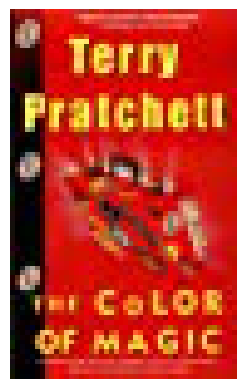

In [155]:
fig= plt.plot(figsize=(3,4))
url = books['img_url'][286]
img = np.asarray(Image.open(requests.get(url, stream=True, headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}).raw))
plt.axis("off")
plt.imshow(img)

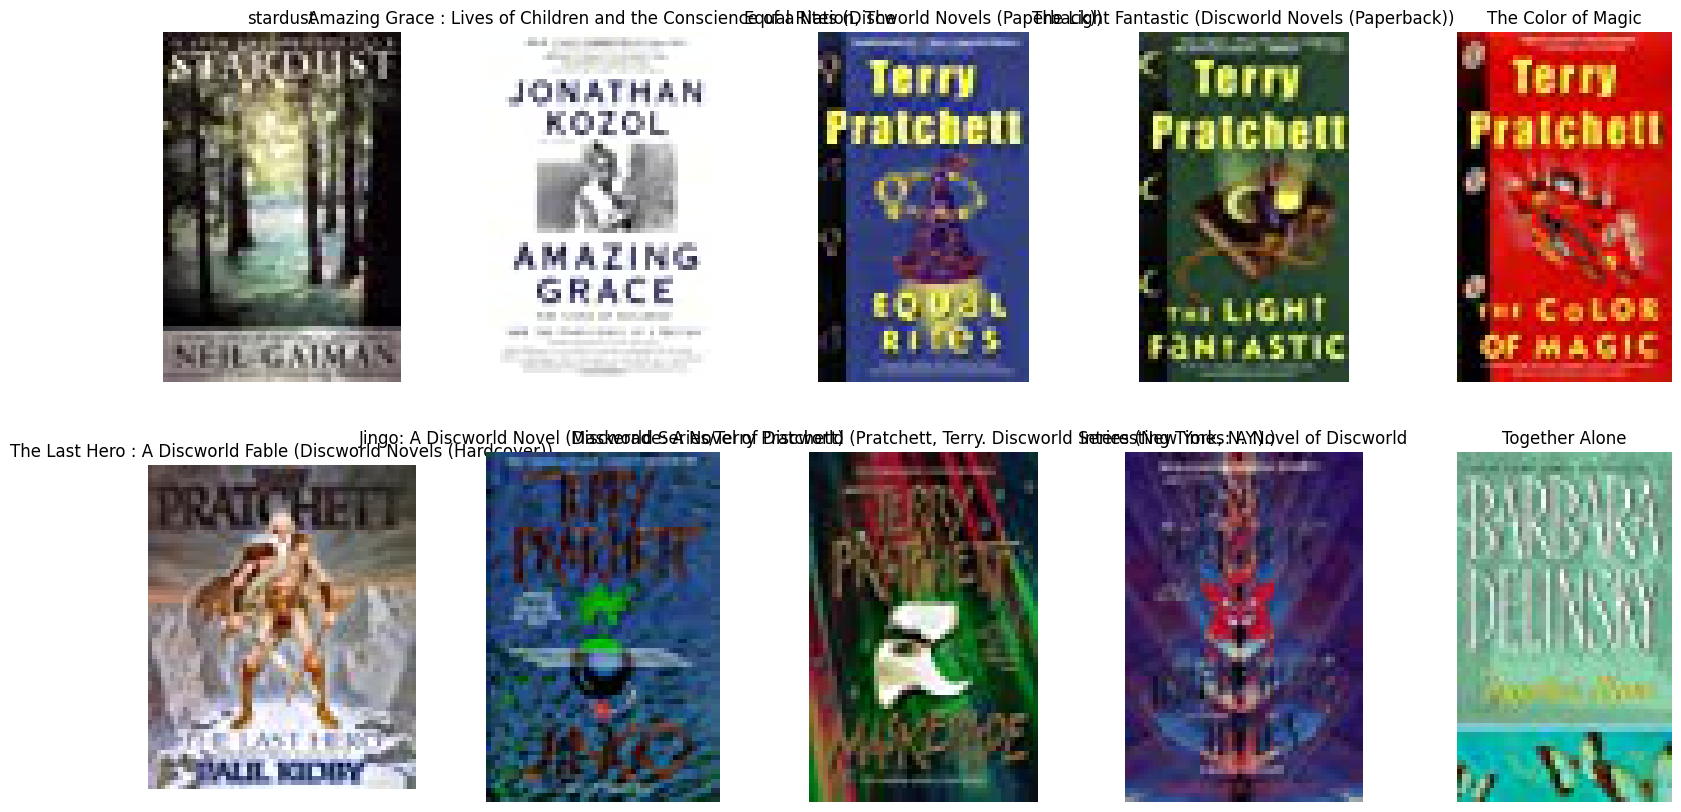

In [156]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10)) 
for i, ax in zip(range(282, 292), ax.flatten()):
    url = books['img_url'][i]
    img = np.asarray(Image.open(requests.get(url, stream=True, headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}).raw))
    ax.imshow(img)
    ax.axis("off")
 
    ax.set_title(books['book_title'][i])

fig.show()

In [157]:
import zipfile
import os

In [158]:
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=19Y56g8oGQyUWhrRkjeSeP_ZJvHKRUzbn' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=19Y56g8oGQyUWhrRkjeSeP_ZJvHKRUzbn" -O images.zip && rm -rf ~/cookies.txt

--2023-04-14 02:24:12--  https://docs.google.com/uc?export=download&confirm=t&id=19Y56g8oGQyUWhrRkjeSeP_ZJvHKRUzbn
Resolving docs.google.com (docs.google.com)... 142.251.222.46, 2404:6800:4004:818::200e
Connecting to docs.google.com (docs.google.com)|142.251.222.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6o22ifisskbt1mj1em0ev3vnitsg411j/1681439025000/01233170983161563057/*/19Y56g8oGQyUWhrRkjeSeP_ZJvHKRUzbn?e=download&uuid=bf2a3de2-7f36-471f-b9a7-6f05481f517c [following]
--2023-04-14 02:24:12--  https://doc-08-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6o22ifisskbt1mj1em0ev3vnitsg411j/1681439025000/01233170983161563057/*/19Y56g8oGQyUWhrRkjeSeP_ZJvHKRUzbn?e=download&uuid=bf2a3de2-7f36-471f-b9a7-6f05481f517c
Resolving doc-08-58-docs.googleusercontent.com (doc-08-58-docs.googleusercontent.com)... 172.217.26.225, 2404:6800:4

In [159]:
pwd

'/opt/ml/code/src/models/CNN_FM'

In [160]:
images_zip = zipfile.ZipFile('/opt/ml/data/task/images.zip')
images_zip.extractall('/opt/ml/data/task/images')

FileNotFoundError: [Errno 2] No such file or directory: '/opt/ml/data/task/images.zip'

In [161]:
data/task/EDA.ipynb

NameError: name 'data' is not defined

In [163]:
books['publisher'].value_counts().head(10)

publisher
Pocket                7306
Harlequin             5268
Bantam Books          4815
St. Martin's Press    4043
Vintage Books USA     3822
Penguin Books         3807
Perennial             3313
Ballantine Books      3090
Signet Book           3068
Avon                  2792
Name: count, dtype: int64

In [166]:
books['publisher'].nunique()

1523

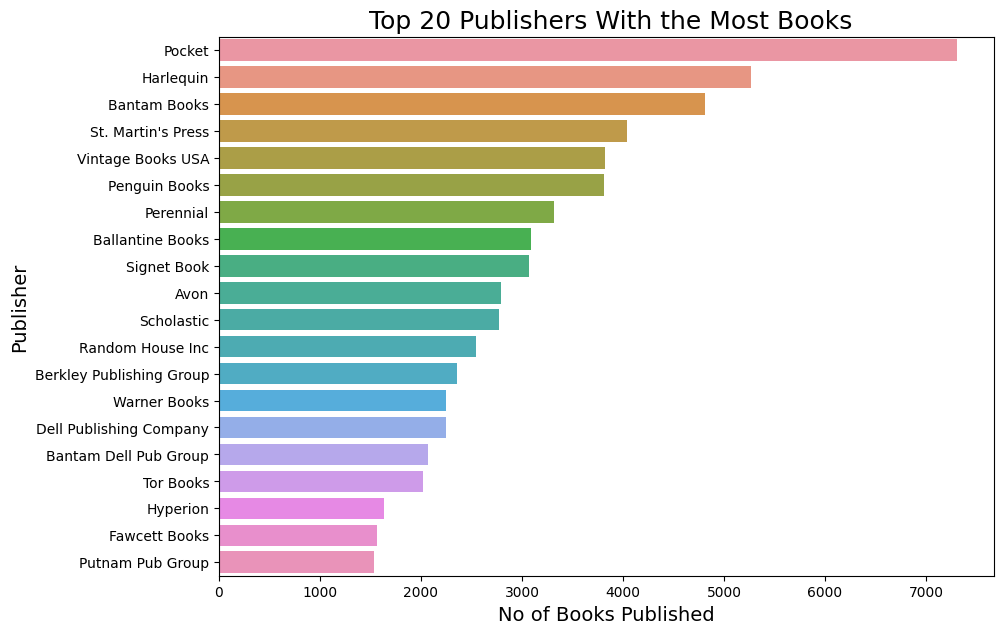

In [167]:
publisher_dict=(books['publisher'].value_counts()).to_dict()
publisher_count_df= pd.DataFrame(list(publisher_dict.items()),columns = ['publisher','count'])

b = publisher_count_df.sort_values(by=['count'], ascending = False)
b = b.head(20)

fig=plt.figure(figsize=(10,7))
ax = sns.barplot(x = 'count',y = 'publisher' , data = b)

plt.xlabel("No of Books Published", size=14)
plt.ylabel("Publisher", size=14)
plt.title(" Top 20 Publishers With the Most Books", size=18)

plt.show()

In [168]:
print(sorted(books['year_of_publication'].unique()),end=' ') 

[1376.0, 1378.0, 1806.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1911.0, 1920.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0] 

### 의문
1376년 부터 2006년 까지의 책으로 구성됨
-> 1376.0, 1378.0, 1806.0, 1900. 오타 아냐..?

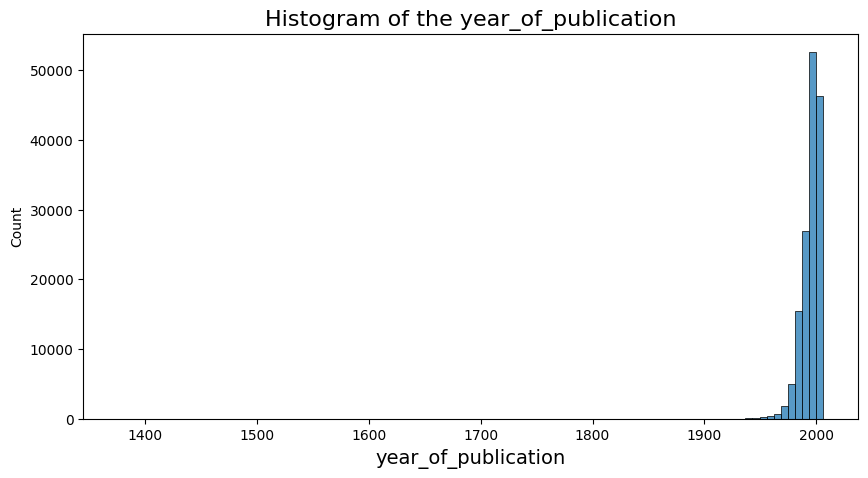

In [169]:
plt.figure(figsize=(10,5))
sns.histplot(books['year_of_publication'],bins=100)
plt.xlabel('year_of_publication',size=14)
plt.title('Histogram of the year_of_publication',size=16)
plt.show()

### 다시보기

In [171]:
publisher_count_df= pd.DataFrame(list(publisher_dict.items()),columns = ['publisher','count'])
b = publisher_count_df.sort_values(by=['count'], ascending = False)

year_of_publication_count_df = pd.DataFrame(books['year_of_publication'].value_counts().sort_index(),columns = ['year of publisher','count'])

In [172]:
year_of_publication_count_df

,year of publisher,count
year_of_publication,,
1376.0,NaN,1
1378.0,NaN,1
1806.0,NaN,1
1900.0,NaN,1
1901.0,NaN,4
...,...,...
2002.0,NaN,11669
2003.0,NaN,9430
2004.0,NaN,3771


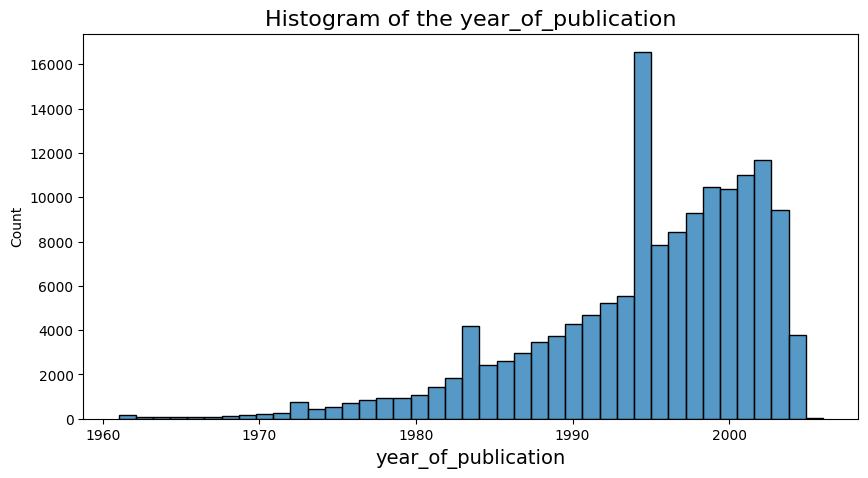

In [173]:
plt.figure(figsize=(10,5))
sns.histplot(books[books['year_of_publication']>1960]['year_of_publication'],bins=41)
plt.xlabel('year_of_publication',size=14)
plt.title('Histogram of the year_of_publication',size=16)
plt.show()

## [4] ratings
ratings 파일은 사용자가 특정 책을 읽고 점수를 매긴 데이터 입니다.

 `user_id`, `isbn`, `rating` 으로 이뤄져있습니다.
 
 `59803명` `306795data` 
 `1-10점` `8점이 제일 많음`

In [176]:
train_ratings.head()

,user_id,isbn,rating
0,8,0002005018,4
1,67544,0002005018,7
2,123629,0002005018,8
3,200273,0002005018,8
4,210926,0002005018,9


In [62]:
train_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306795 entries, 0 to 306794
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  306795 non-null  int64 
 1   isbn     306795 non-null  object
 2   rating   306795 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.0+ MB


In [177]:
train_ratings['user_id'].nunique()

59803

In [179]:
ratings.shape

(306795, 3)

In [181]:
ratings['rating'].value_counts(normalize=True) 

rating
8     0.239877
7     0.172519
9     0.158650
10    0.139422
6     0.082501
5     0.045995
1     0.043185
2     0.042142
4     0.041419
3     0.034290
Name: proportion, dtype: float64

In [182]:
ratings.groupby('user_id')['rating'].count().sort_values(ascending=False)

user_id
11676     5520
98391     4560
189835    1503
153662    1496
23902      956
          ... 
47317        1
150670       1
150676       1
150677       1
138957       1
Name: rating, Length: 59803, dtype: int64

In [183]:
heavy_users_list = ratings.groupby('user_id')['rating'].count().sort_values(ascending=False).head(20).index

In [184]:
ratings[ratings['user_id'].isin(heavy_users_list)].groupby('user_id')['rating'].mean()

user_id
11676     6.779891
16795     6.423684
23902     7.174686
35859     7.175896
56399     9.312036
76499     8.477778
95359     7.200820
98391     8.566228
101851    8.420354
114368    4.364389
153662    8.209893
158295    5.770270
171118    6.961089
177458    6.757794
182085    8.210269
185233    3.263914
189835    3.184298
197659    8.116170
235105    7.713054
248718    7.419009
Name: rating, dtype: float64

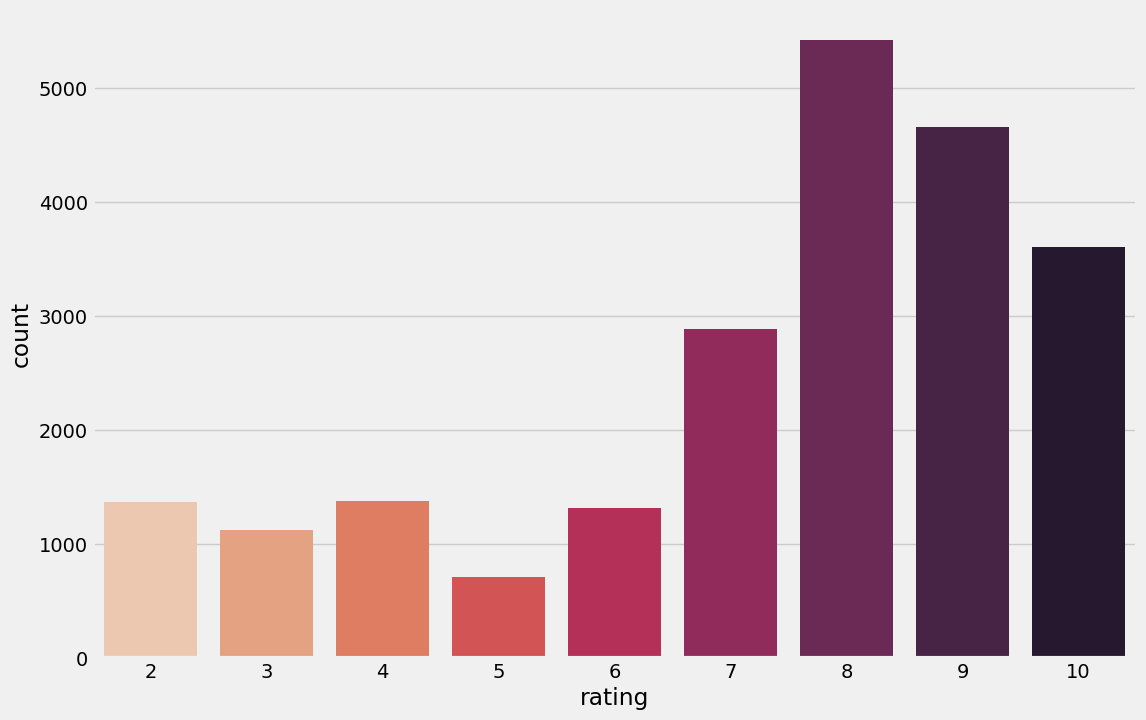

In [185]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings[(ratings['user_id'].isin(heavy_users_list))&(ratings['rating']>1)] , x='rating', palette='rocket_r')
plt.show()

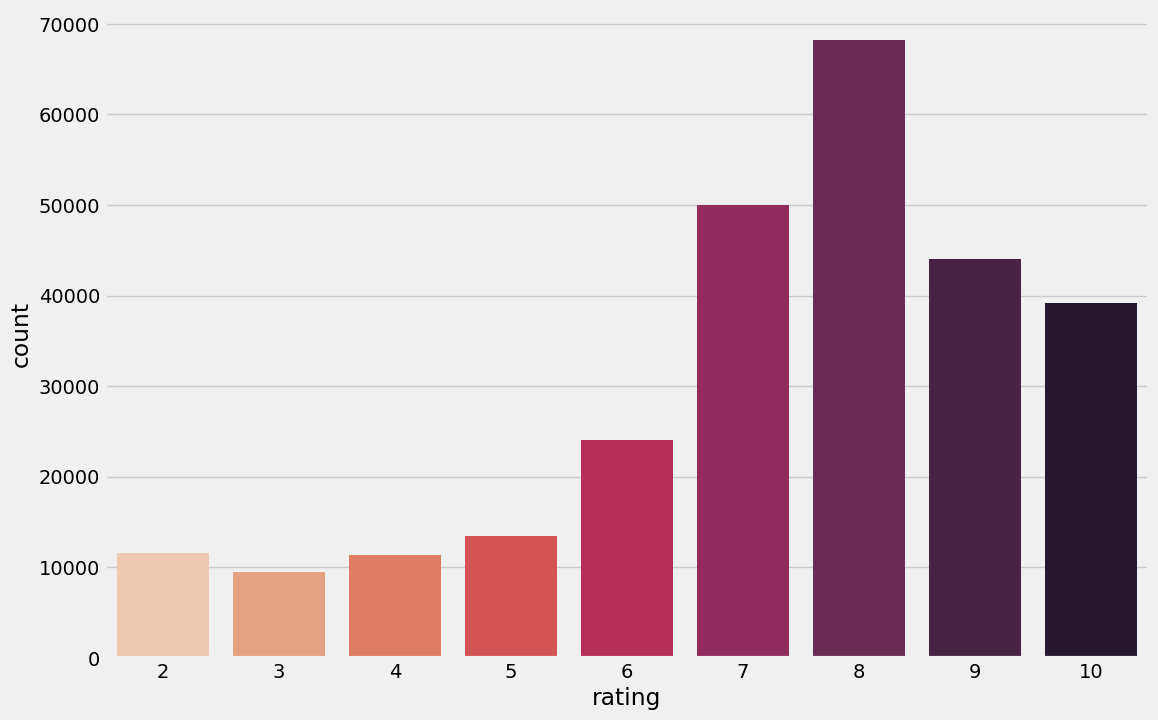

In [186]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings[~(ratings['user_id'].isin(heavy_users_list))&(ratings['rating']>1)] , x='rating', palette='rocket_r')
plt.show()

> heavy유저들은 10점을 잘 주지 않는 것으로 보임 
> 평균적으로 8점을 주는 유저의 경우가 많음

In [188]:
ratings.groupby('isbn')['rating'].count().sort_values(ascending=False)

isbn
0316666343    566
0971880107    465
0385504209    390
0312195516    307
0060928336    256
             ... 
0520060199      1
0520059808      1
0520058852      1
0520058763      1
B000234N3A      1
Name: rating, Length: 129777, dtype: int64

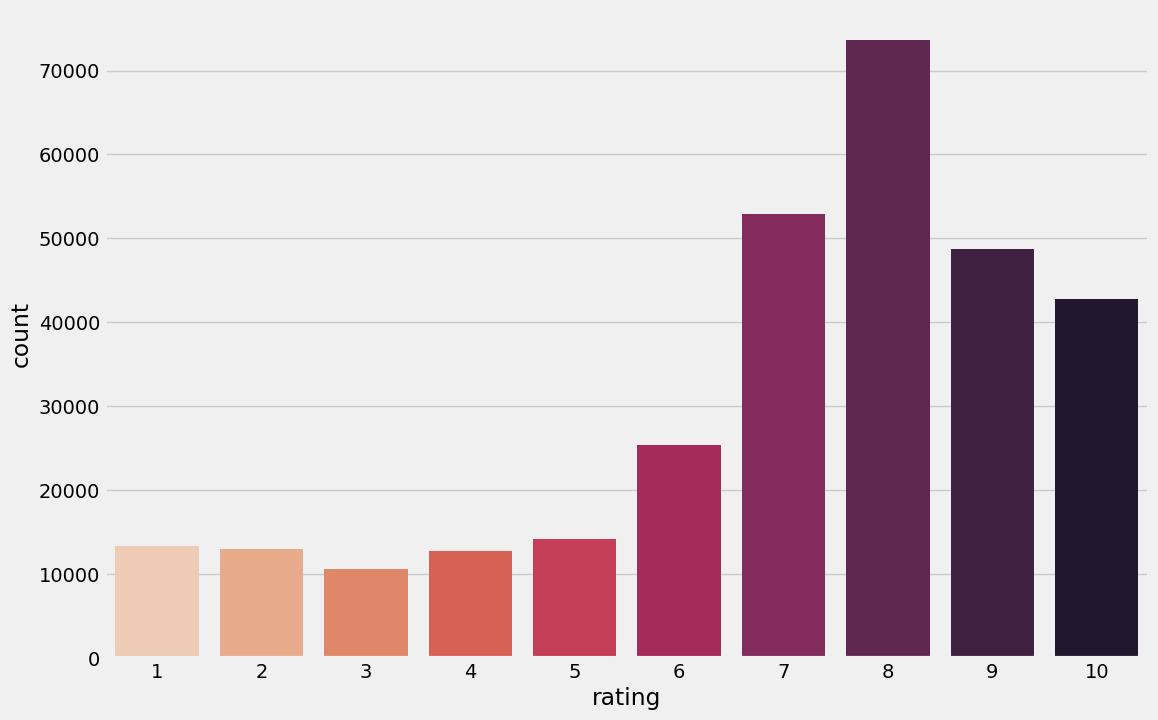

In [190]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=train_ratings , x='rating', palette='rocket_r')
plt.show()


### [5] 파일 merge

이제 세 파일을 모두 합쳐서 컬럼간의 관계를 살펴보도록 하겠습니다.

In [193]:
merge1 = train_ratings.merge(books, how='left', on='isbn')
data = merge1.merge(users, how='inner', on='user_id')
print('merge 결과 shape: ', data.shape)

merge 결과 shape:  (306795, 18)


In [195]:
train_ratings.shape

(306795, 3)

In [196]:
set(ratings['isbn']) - set(books['isbn']) 

set()

### (5-1) 시각화

In [197]:
popular_book_list = data['book_title'].value_counts().sort_values(ascending=False)[:30].index
popular_book = data[data['book_title'].isin(popular_book_list)]

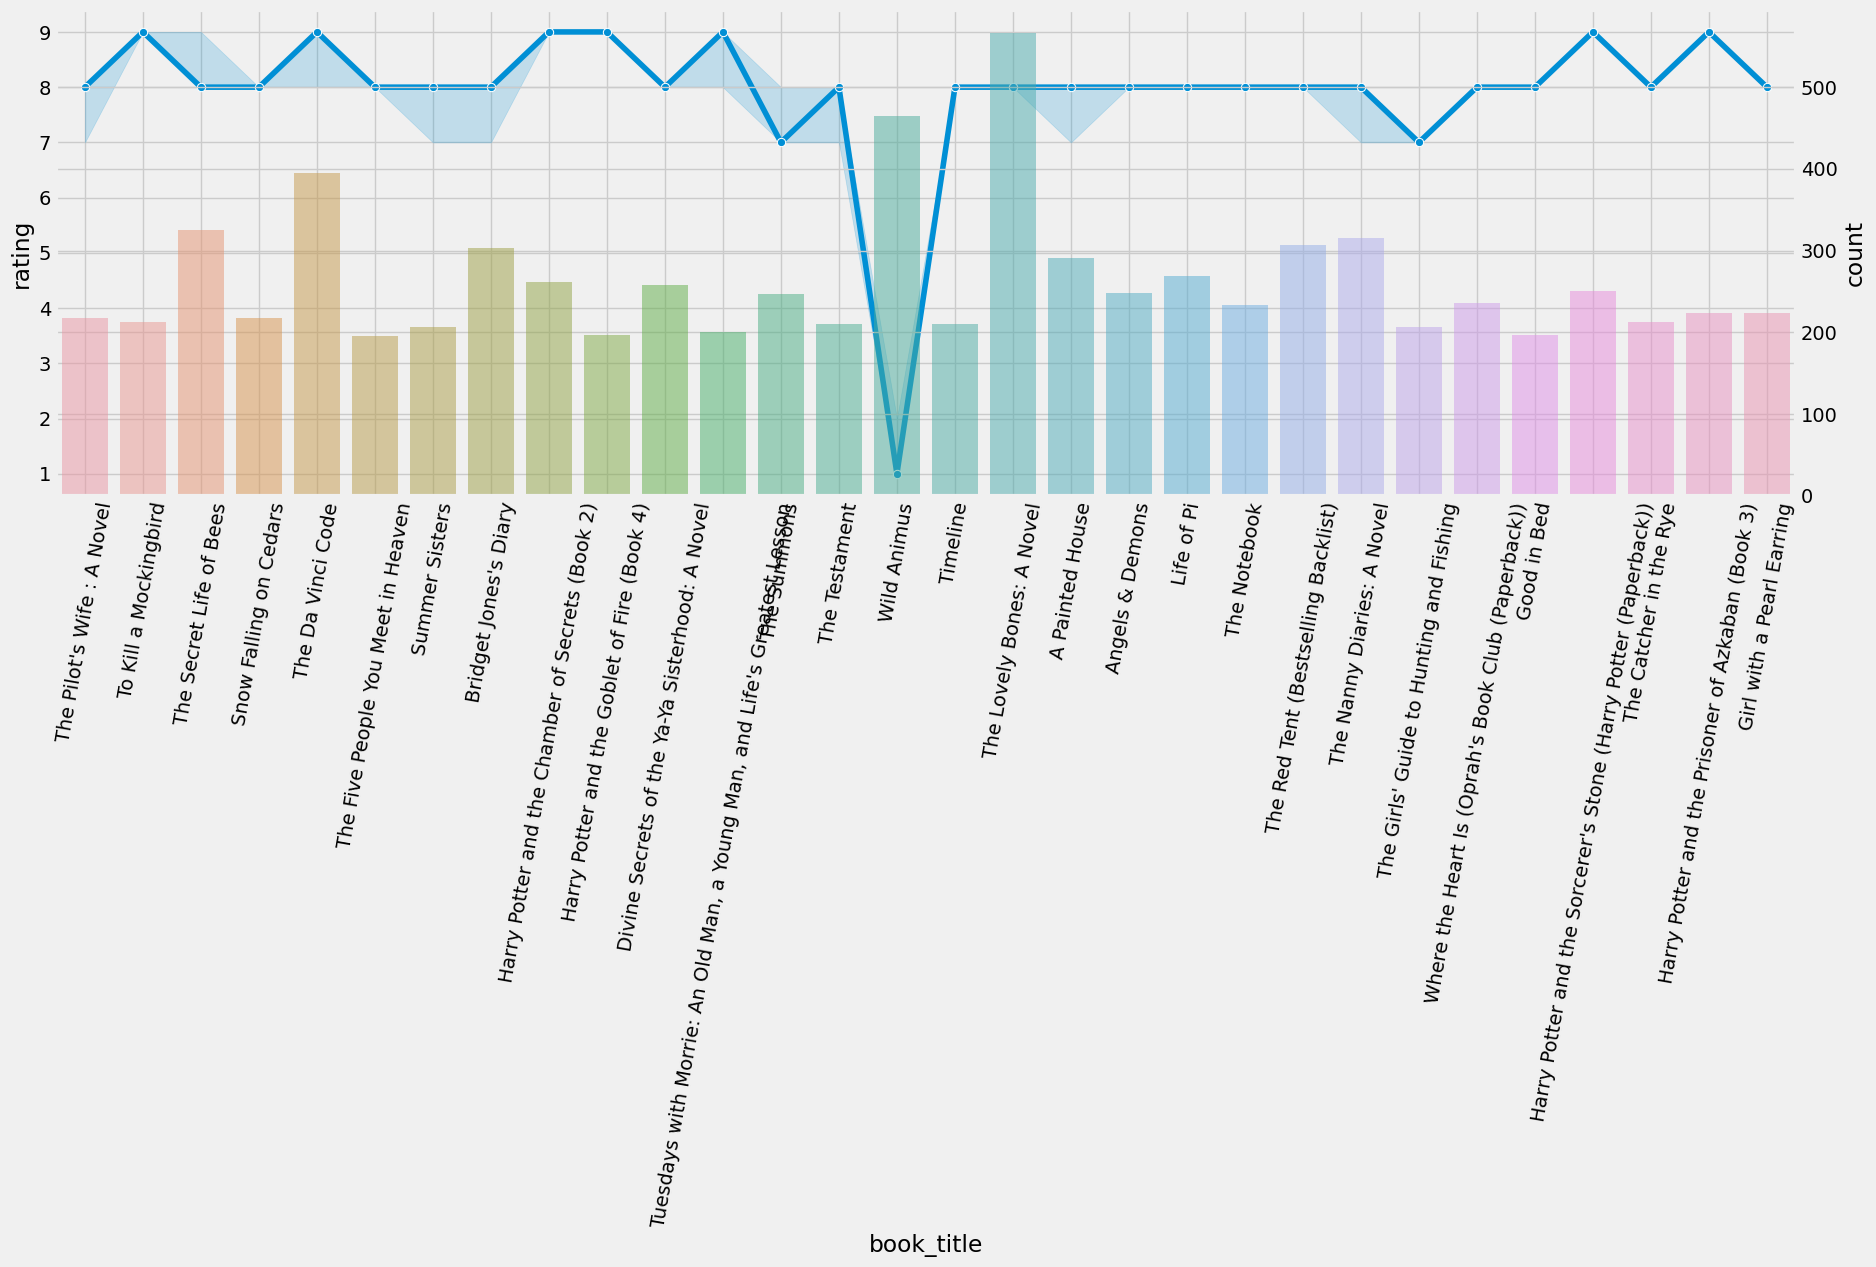

In [198]:
fig, ax1 = plt.subplots(figsize=(20,6))
plt.xticks(rotation=80)
sns.lineplot(data = popular_book,x='book_title',y='rating' ,marker='o', estimator=np.median, ax=ax1)
ax2 = ax1.twinx()

sns.countplot(data=popular_book, x='book_title', alpha=0.5, ax=ax2)
plt.show()

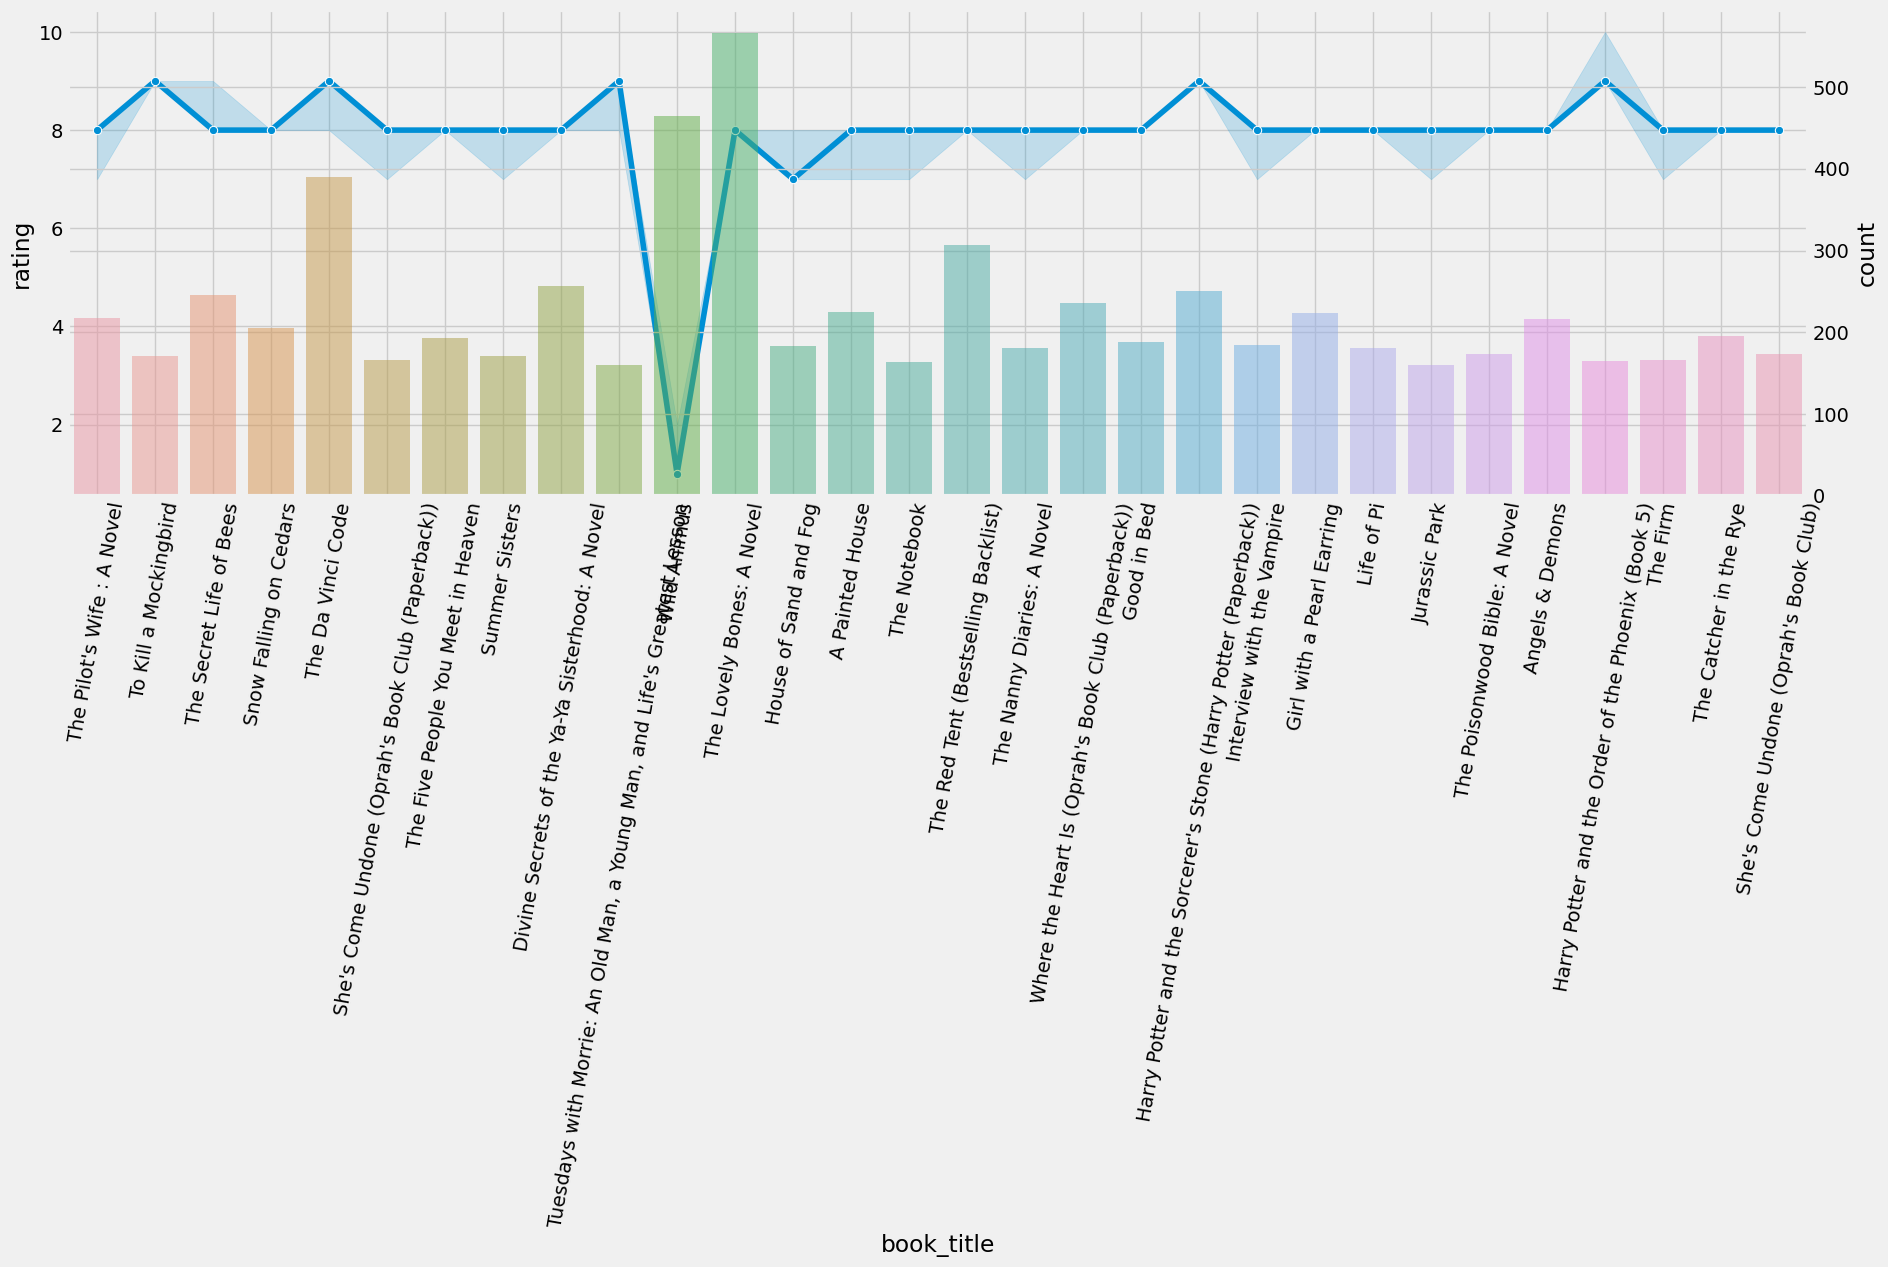

In [199]:
popular_book_list = data['isbn'].value_counts().sort_values(ascending=False)[:30].index
popular_book = data[data['isbn'].isin(popular_book_list)]

fig, ax1 = plt.subplots(figsize=(20,6))
plt.xticks(rotation=80)
sns.lineplot(data = popular_book,x='book_title',y='rating' ,marker='o', estimator=np.median, ax=ax1)
ax2 = ax1.twinx()

sns.countplot(data=popular_book, x='book_title', alpha=0.5, ax=ax2)
plt.show()

book_title을 사용했을때와 isbn을 사용한 결과에 차이가 있는 것을 볼 수 있음


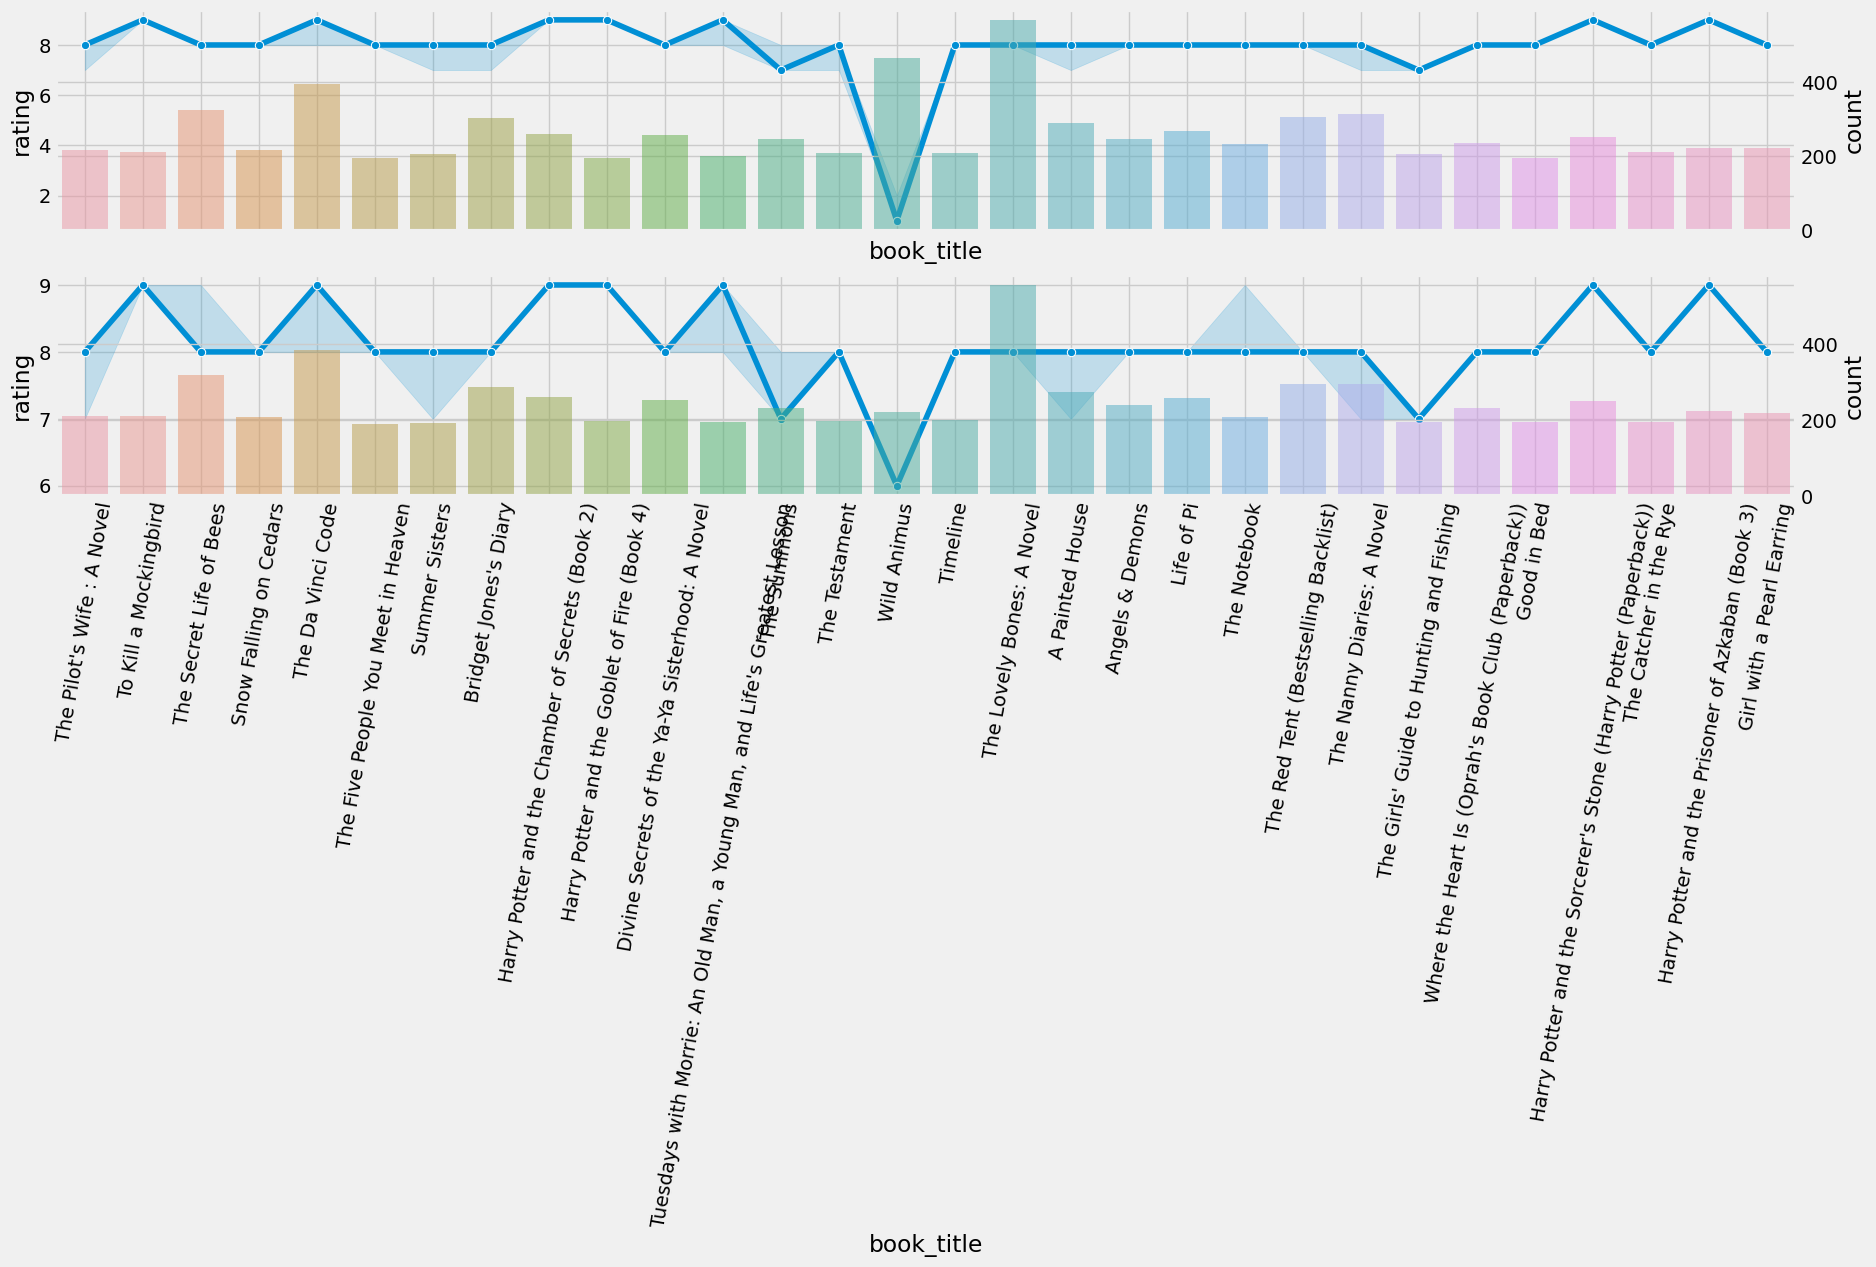

In [201]:
# book title을 사용했을떄
popular_book_list = data['book_title'].value_counts().sort_values(ascending=False)[:30].index
popular_book = data[data['book_title'].isin(popular_book_list)]

fig, ax1 = plt.subplots(2,1, figsize=(20,6))
plt.xticks(rotation=80)
plot1 = sns.lineplot(data = popular_book,x='book_title',y='rating' ,marker='o', estimator=np.median, ax=ax1[0])
plot1 = sns.countplot(data=popular_book, x='book_title', alpha=0.5, ax=ax1[0].twinx())
plot1.set_xticklabels([])


plot2 = sns.lineplot(data = popular_book[popular_book['rating']>1],x='book_title',y='rating' ,marker='o', estimator=np.median, ax=ax1[1])
plot2 = sns.countplot(data=popular_book[popular_book['rating']>1], x='book_title', alpha=0.5, ax=ax1[1].twinx())
plt.show()

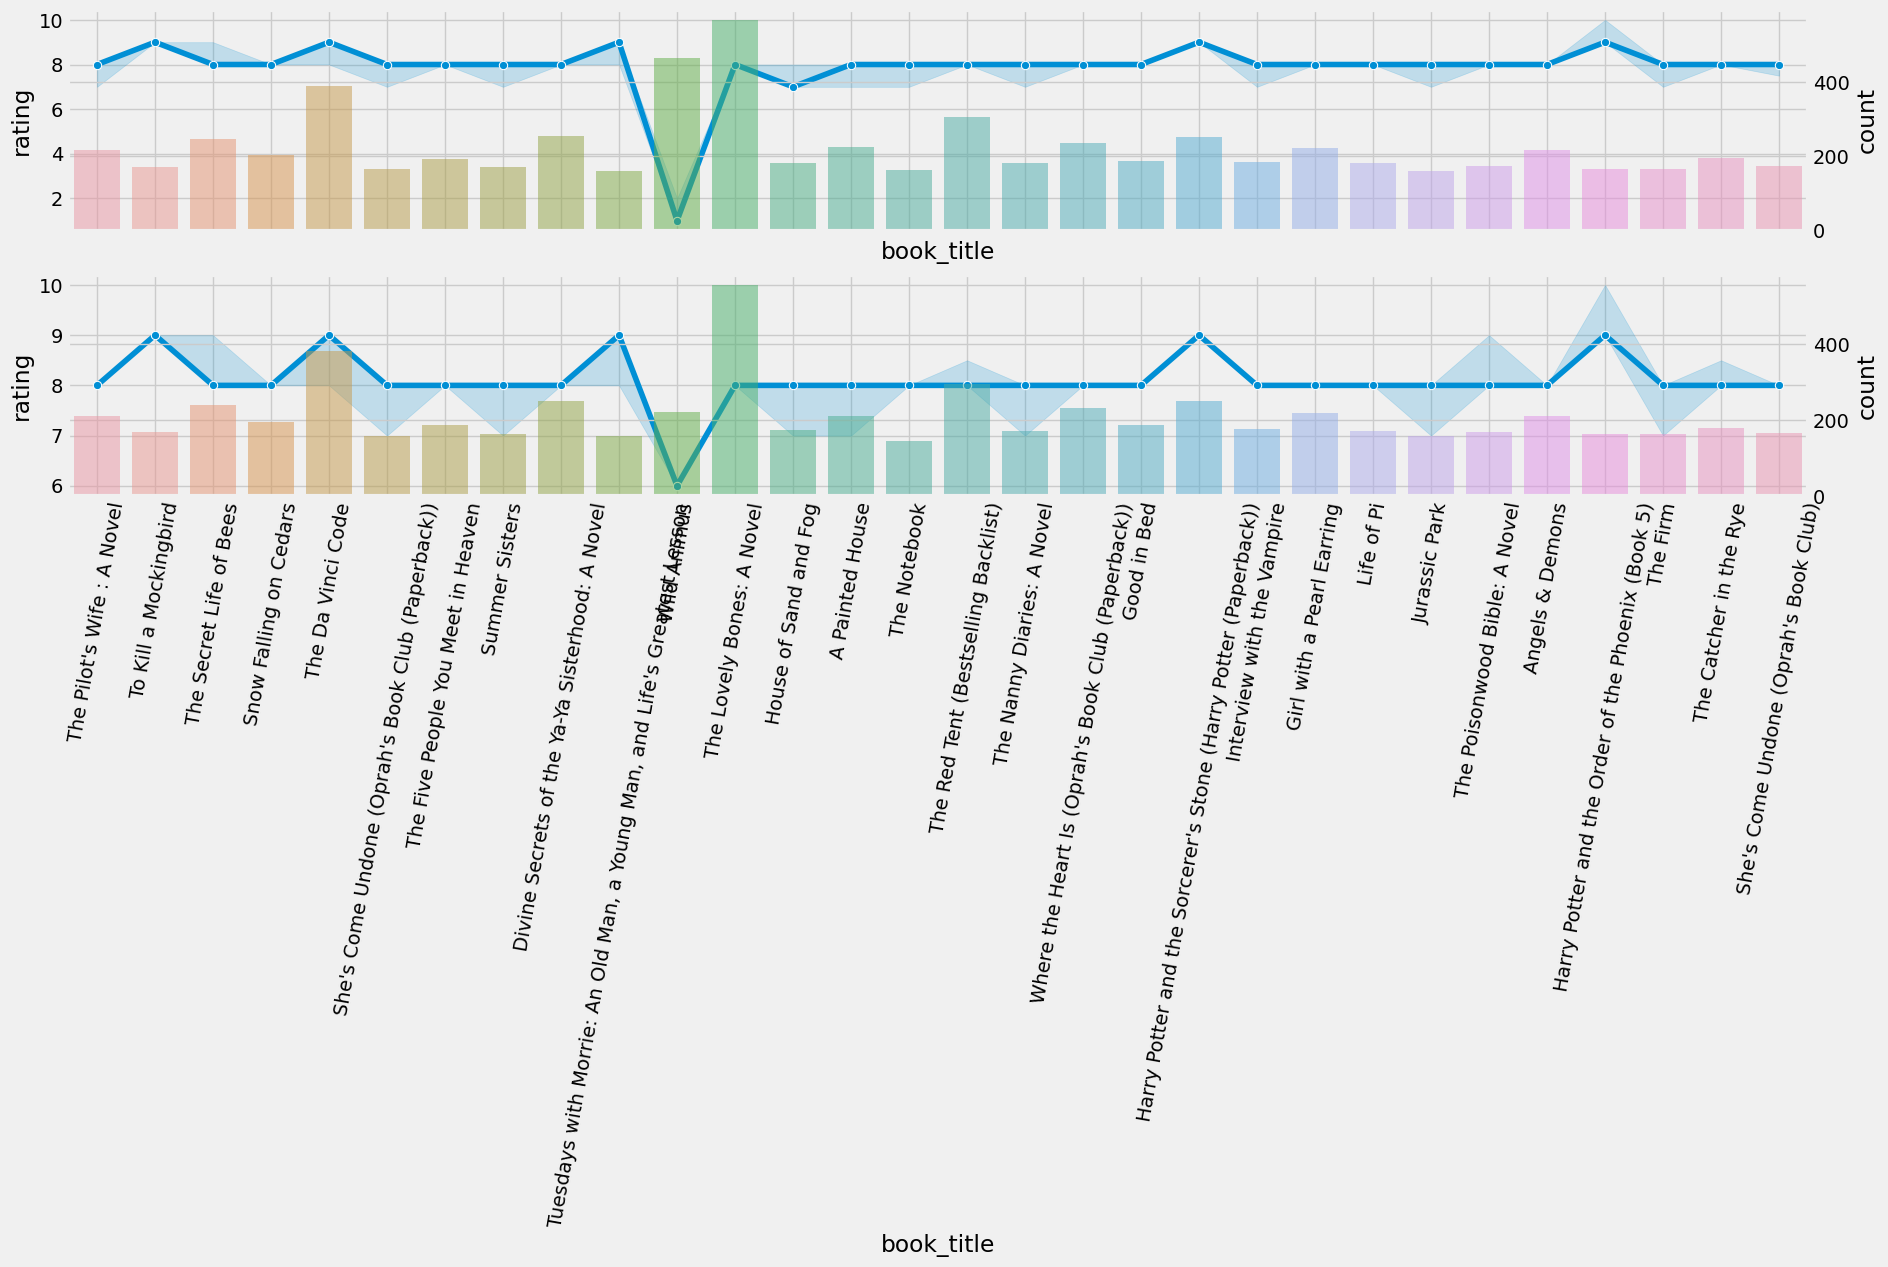

In [202]:
# isbn을 사용했을 때
popular_book_list = data['isbn'].value_counts().sort_values(ascending=False)[:30].index
popular_book = data[data['isbn'].isin(popular_book_list)]
fig, ax1 = plt.subplots(2,1, figsize=(20,6))
plt.xticks(rotation=80)
plot1 = sns.lineplot(data=popular_book,x='book_title',y='rating' ,marker='o', estimator=np.median, ax=ax1[0])
plot1 = sns.countplot(data=popular_book, x='book_title', alpha=0.5, ax=ax1[0].twinx())
plot1.set_xticklabels([])

plot2 = sns.lineplot(data = popular_book[popular_book['rating']>1],x='book_title',y='rating' ,marker='o', estimator=np.median, ax=ax1[1])
plot2 = sns.countplot(data=popular_book[popular_book['rating']>1], x='book_title', alpha=0.5, ax=ax1[1].twinx())
plt.show()

### 의문
훅떨어지는 구간은 뭐지?


In [203]:
popular_cate_list = data['category_high'].value_counts().sort_values(ascending=False)[:10].index
popular_cate = data[data['category_high'].isin(popular_cate_list)]

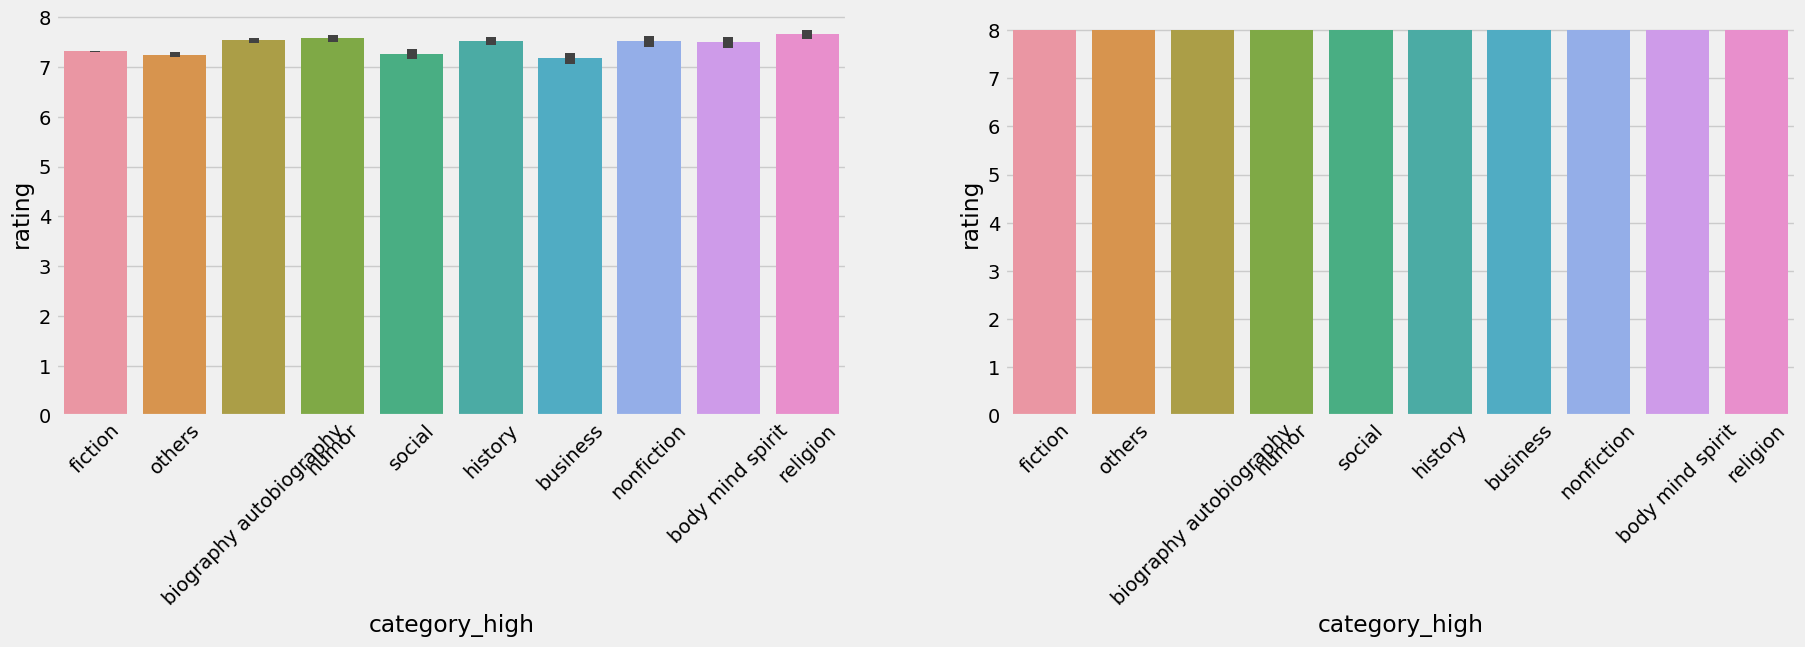

In [204]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

plot1 = sns.barplot(data=popular_cate[popular_cate['rating']>1], x='category_high', y='rating', estimator=np.mean, ax=ax[0], )
plot2 = sns.barplot(data=popular_cate[popular_cate['rating']>1], x='category_high', y='rating', estimator=np.median, ax=ax[1])
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45)
plt.show()

### 의문 
1. rating의 중간값과 평균값의 차이가 별로 없음을 통해서 카테고리 간 점수차이는 크게가 없는 것으로 도출된 것인가?
2. 왜 1점이상인 것을 먼저 뜯어본 것?

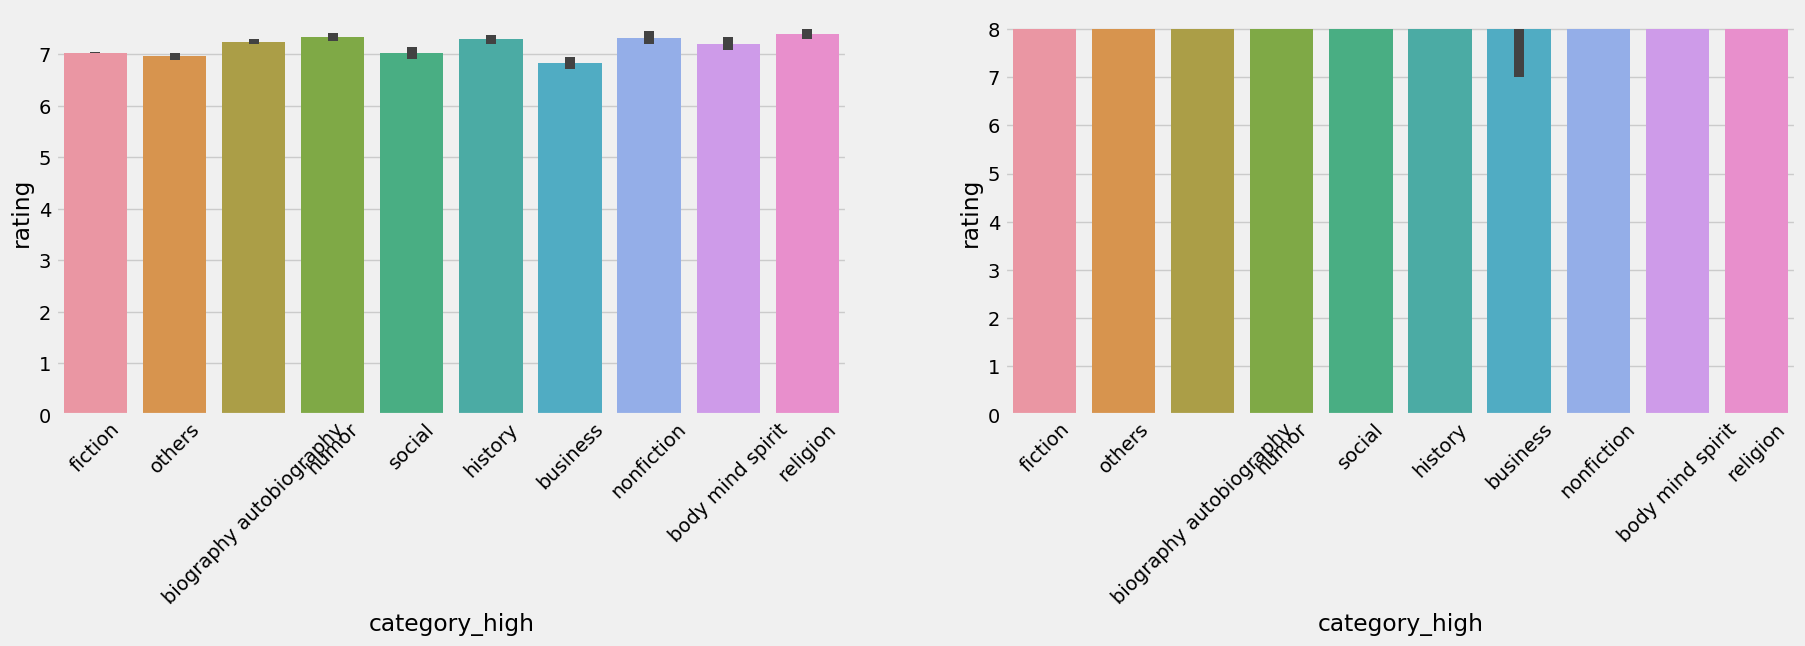

In [205]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

plot1 = sns.barplot(data=popular_cate, x='category_high', y='rating', estimator=np.mean, ax=ax[0], )
plot2 = sns.barplot(data=popular_cate, x='category_high', y='rating', estimator=np.median, ax=ax[1])
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
users = pd.read_csv(path +'users.csv')
books = pd.read_csv(path + "books.csv")
train_ratings = pd.read_csv(path + "train_ratings.csv")
test_ratings = pd.read_csv(path + "test_ratings.csv")

In [ ]:
#  csv로 저장 
with open('EDA1_users.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(users)
